# cài đặt các thư viện cần thiết

In [435]:
%pip install matplotlib pandas numpy seaborn wordcloud nltk

Note: you may need to restart the kernel to use updated packages.


# Import các thư viện cần thiết

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re

# Import dữ liệu


In [5]:
data = pd.read_csv('Data\Kindle_Cleaned.csv')

# tổng quan

In [1540]:
data.columns

Index(['post_id', 'post_text', 'time', 'timestamp', 'likes', 'comments',
       'shares', 'post_url', 'comments_full', 'reactors', 'reaction_count',
       'fetched_time', 'day', 'like', 'love', 'care', 'haha', 'sad', 'wow',
       'angry', 'combined_score'],
      dtype='object')

# Thống kê tương tác 

Lâp biểu đồ chỉ số reaction_count theo thời gian

In [1507]:
# Biểu đồ tổng số reaction_count theo thời gian
x = data['time'].to_list()
y = data['reaction_count'].to_list()

x.reverse()
y.reverse()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(x, y, color='green')
ax.fill_between(x, y, color='lightgreen', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
plt.title('Biểu đồ Reaction Count theo thời gian')
ax.set_xticks(np.arange(0, 7 * 67, 67))
ax.set_xlabel('time')
ax.set_ylabel('reaction_count')
ax.set_xlim(0, 7 * 50)

# Gán nhãn cho bài đăng có reaction_count cao nhất và thấp nhất
max_index = np.argmax(y)
min_index = np.argmin(y)
max_label = f"Max: {y[max_index]}"
min_label = f"Min: {y[min_index]}"
ax.annotate(max_label, (x[max_index], y[max_index]), xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(min_label, (x[min_index], y[min_index]), xytext=(10, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", lw=1.5))

# Hiển thị thông tin ngày tháng năm cho bài đăng có reaction_count lớn nhất và thấp nhất
top_10_indices = np.argsort(y)[-10:]
top_10_dates = [x[i] for i in top_10_indices]
min_date = x[min_index]
xticks_labels = top_10_dates + [min_date]
ax.set_xticks(xticks_labels)
ax.set_xticklabels(xticks_labels, rotation=45)

plt.show()

In [1551]:
# Tìm bài đăng có số lượng reaction cao nhất
post_with_highest_reactions = data.loc[data['reaction_count'].idxmax()]

# in ra một số thông tin cần thiết về bài đăng có số lượng reaction cao nhất
print("\nPost with the highest number of  reactions:")
print("Post Text:", post_with_highest_reactions["post_text"])
print("Time:", post_with_highest_reactions["time"])
print("Post URL:", post_with_highest_reactions["post_url"])
print("Likes:", post_with_highest_reactions["like"])
print("Haha Reactions:", post_with_highest_reactions["haha"])
print("Care Reactions:", post_with_highest_reactions["care"])
print("love Reactions:", post_with_highest_reactions["love"])
print("Angry Reactions:", post_with_highest_reactions["angry"])
print("Sad Reactions:", post_with_highest_reactions["sad"])
print("Comments:", post_with_highest_reactions["comments"])
print("Shares:", post_with_highest_reactions["shares"])


Post with the highest number of  reactions:
Post Text: Star athlete and activist Colin Kaepernick shares what books he's read and loved lately and why he chose them.
https://amzn.to/3aGnzwj
Time: 2022-07-16 14:23:01
Post URL: https://facebook.com/Kindle/posts/10160218112901558
Likes: 189
Haha Reactions: 469
Care Reactions: 4
love Reactions: 26
Angry Reactions: 177
Sad Reactions: 2
Comments: 1600
Shares: 18


In [1555]:
# Lấy số lượng từng loại reaction dưới dạng danh sách
reactions = ['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']
reaction_counts = [post_with_highest_reactions[reaction].sum() for reaction in reactions]

# Tính tỷ lệ phần trăm
total_reaction_count = sum(reaction_counts)
percentages = [count / total_reaction_count * 100 for count in reaction_counts]

# Xác định ngưỡng để coi một lát đồ thị là "nhỏ"
threshold = 5  # Tỷ lệ phần trăm

# Nhóm các lát nhỏ thành một lát "other" nếu tổng tỷ lệ phần trăm của chúng dưới ngưỡng
small_percentage = sum(percentages[3:6])
if small_percentage < threshold:
    other_percentage = small_percentage
    percentages[3:6] = [0, 0, 0]
else:
    other_percentage = 0

# Tạo biểu đồ hình tròn
labels = ['Like', 'Love', 'Haha', 'Other', 'Angry']
colors = ['#3CB371', '#FF1493', '#FFD700', '#808080', '#FF4500']  # Màu sắc tùy chỉnh cho từng lát
plt.figure(figsize=(10, 6))
pie = plt.pie(percentages[:3] + [other_percentage] + percentages[6:], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Reaction Distribution of post_with_highest_reactions ")

# Thêm hiệu ứng đổ bóng vào biểu đồ hình tròn
plt.gca().set_aspect('equal')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

# Di chuyển chú giải xuống góc dưới bên phải
plt.legend(pie[0], labels, loc='lower right')

plt.show()

In [1549]:
# Tìm bài đăng có số lượng reaction thấp nhất
post_with_lowest_reactions = data.loc[data['reaction_count'].idxmin()]

# in ra một số thông tin cần thiết về bài đăng có số lượng reaction thấp nhất
print("\nPost with the lowest number of reactions:")
print("Post Text:", post_with_lowest_reactions["post_text"])
print("Time:", post_with_lowest_reactions["time"])
print("Post URL:", post_with_lowest_reactions["post_url"])
print("Likes:", post_with_lowest_reactions["like"])
print("Haha Reactions:", post_with_lowest_reactions["haha"])
print("Care Reactions:", post_with_lowest_reactions["care"])
print("love Reactions:", post_with_lowest_reactions["love"])
print("Angry Reactions:", post_with_lowest_reactions["angry"])
print("Sad Reactions:", post_with_lowest_reactions["sad"])
print("Comments:", post_with_lowest_reactions["comments"])
print("Shares:", post_with_lowest_reactions["shares"])


Post with the lowest number of reaction reactions:
Post Text: If you love books about adventures on boats, plane, trains, and automobiles - this roundup's for you.
https://amzn.to/3LaDy24
Time: 2022-03-23 14:58:58
Post URL: https://facebook.com/Kindle/posts/10159993610536558
Likes: 18
Haha Reactions: 0
Care Reactions: 0
love Reactions: 0
Angry Reactions: 0
Sad Reactions: 0
Comments: 2
Shares: 3


lập Biểu đồ Comments, Shares và Reaction Count theo thời gian

In [1545]:
data[['shares', 'comments', 'reaction_count']] = data[['shares', 'comments', 'reaction_count']].astype(int)
data[['shares', 'comments', 'reaction_count']].describe()

shares     comments  reaction_count
count  348.000000   348.000000      348.000000
mean     4.678161    30.669540       58.571839
std      7.655770   116.607237       70.587596
min      0.000000     1.000000       18.000000
25%      1.000000     4.000000       31.000000
50%      3.000000     9.000000       39.000000
75%      5.000000    19.000000       58.000000
max     85.000000  1600.000000      869.000000

In [1508]:
# Sắp xếp dữ liệu theo thời gian
data.sort_values('time', inplace=True)

# Chuyển đổi cột time thành kiểu datetime
data['time'] = pd.to_datetime(data['time'])

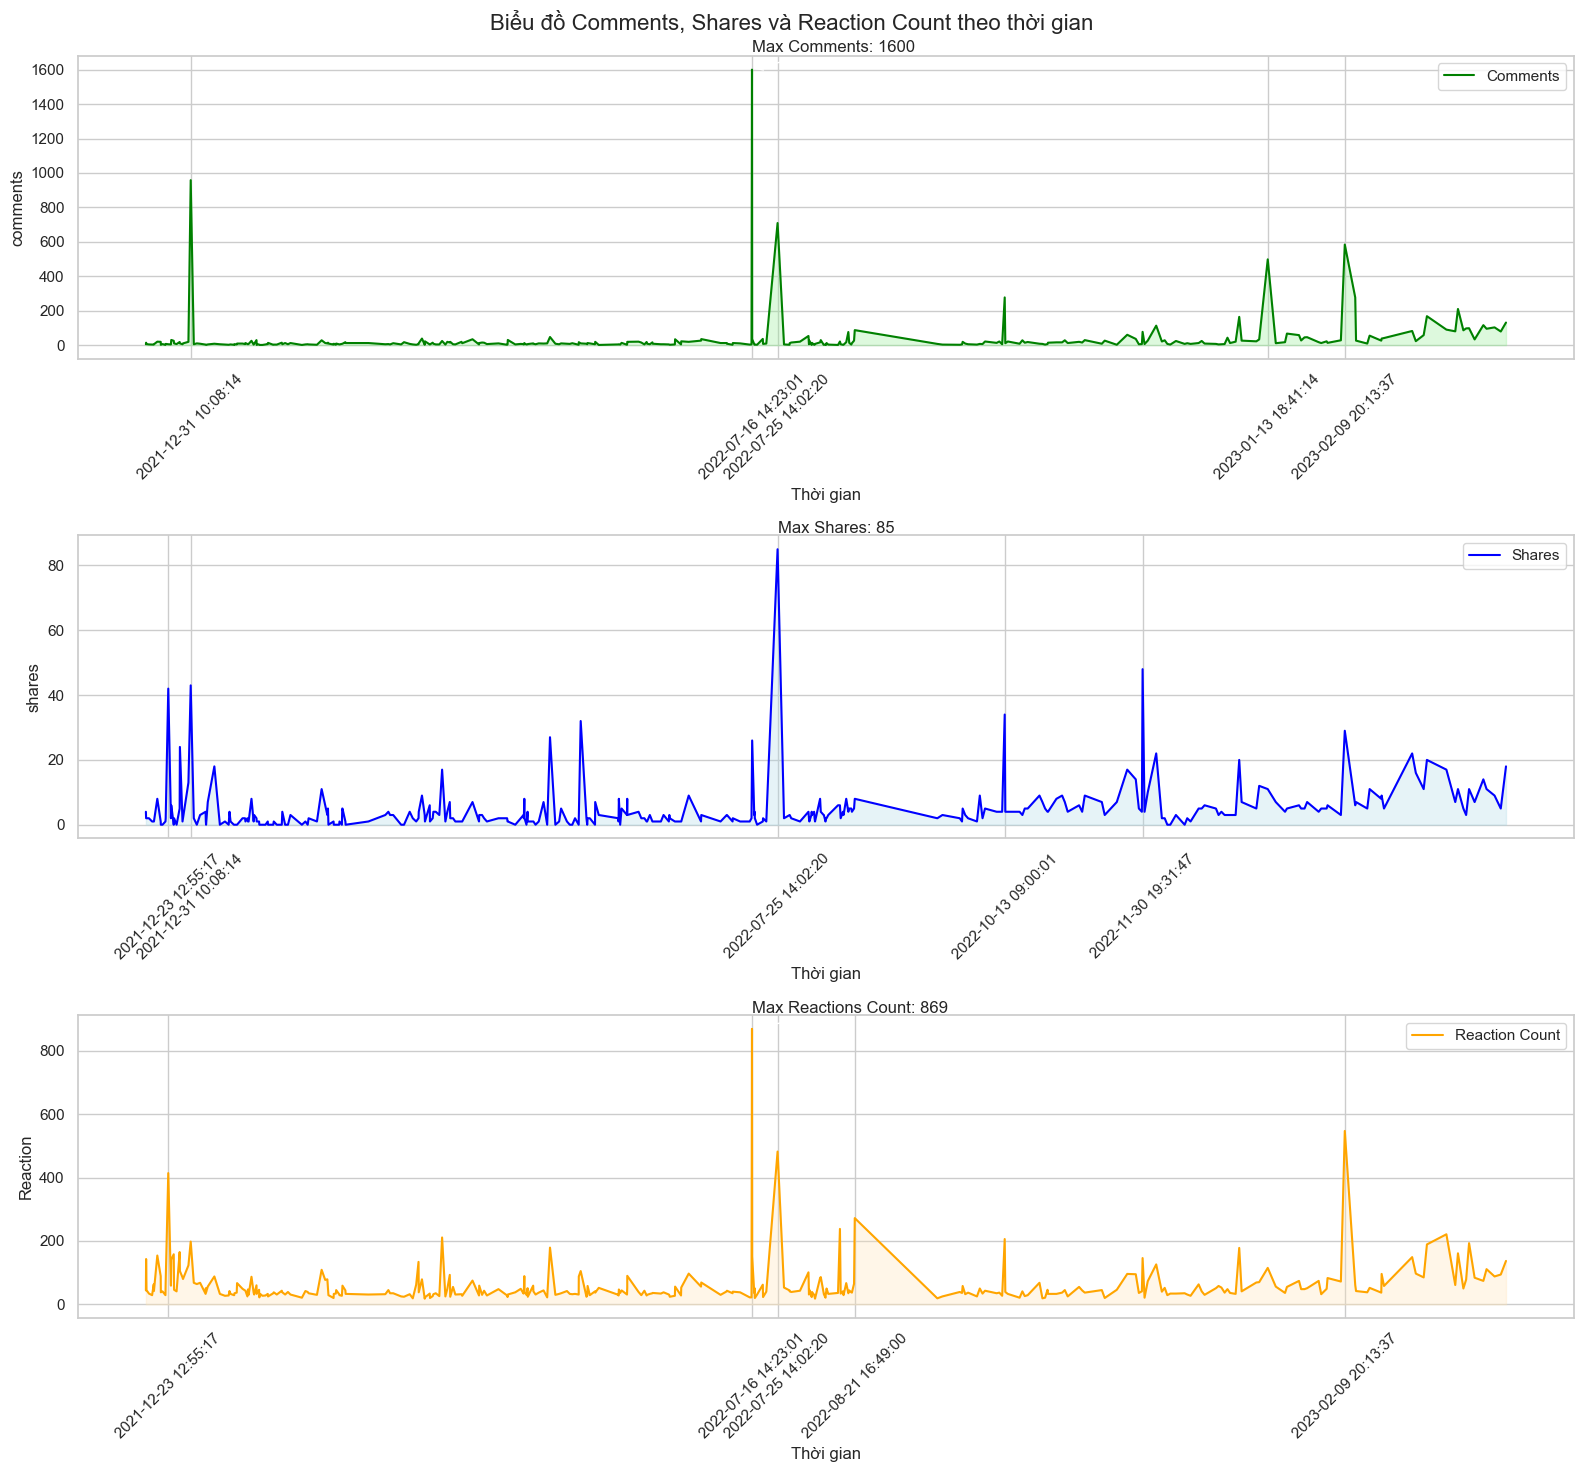

In [1509]:


# Vẽ dữ liệu
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15))

ax1.plot(data['time'], data['comments'], label='Comments', color='green')
ax1.fill_between(data['time'], data['comments'], color='lightgreen', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
ax1.legend()
ax1.set_xlabel('Thời gian')
ax1.set_ylabel('comments')

ax2.plot(data['time'], data['shares'], label='Shares', color='blue')
ax2.fill_between(data['time'], data['shares'], color='lightblue', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
ax2.legend()
ax2.set_xlabel('Thời gian')
ax2.set_ylabel('shares')

ax3.plot(data['time'], data['reaction_count'], label='Reaction Count', color='orange')
ax3.fill_between(data['time'], data['reaction_count'], color='moccasin', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax3.xaxis.set_major_locator(plt.MaxNLocator(7))
ax3.legend()
ax3.set_xlabel('Thời gian')
ax3.set_ylabel('Reaction')

# Lưu lại các giá trị tối đa
max_comments_idx = data['comments'].idxmax()
max_shares_idx = data['shares'].idxmax()
max_reactions_count_idx = data['reaction_count'].idxmax()

ax1.annotate(f'Max Comments: {data.at[max_comments_idx, "comments"]}', xy=(data.at[max_comments_idx, "time"], data.at[max_comments_idx, "comments"]), xytext=(data.at[max_comments_idx, "time"], data.at[max_comments_idx, "comments"]+100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax2.annotate(f'Max Shares: {data.at[max_shares_idx, "shares"]}', xy=(data.at[max_shares_idx, "time"], data.at[max_shares_idx, "shares"]), xytext=(data.at[max_shares_idx, "time"], data.at[max_shares_idx, "shares"]+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax3.annotate(f'Max Reactions Count: {data.at[max_reactions_count_idx, "reaction_count"]}', xy=(data.at[max_reactions_count_idx, "time"], data.at[max_reactions_count_idx, "reaction_count"]), xytext=(data.at[max_reactions_count_idx, "time"], data.at[max_reactions_count_idx, "reaction_count"]+50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt comments lớn nhất
top_5_Comments = np.argsort(data['comments'])[-5:]
top_5_Comments_dates = [x[i] for i in top_5_Comments]
xticks_labels = top_5_Comments_dates
ax1.set_xticks(xticks_labels)
ax1.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt shares lớn nhất
top_5_shares = np.argsort(data['shares'])[-5:]
top_5_shares_dates = [x[i] for i in top_5_shares]
xticks_labels = top_5_shares_dates
ax2.set_xticks(xticks_labels)
ax2.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt reaction lớn nhất
top_5_reaction_count = np.argsort(data['reaction_count'])[-5:]
top_5_reaction_count_dates = [x[i] for i in top_5_reaction_count]
xticks_labels = top_5_reaction_count_dates
ax3.set_xticks(xticks_labels)
ax3.set_xticklabels(xticks_labels, rotation=45)

plt.suptitle('Biểu đồ Comments, Shares và Reaction Count theo thời gian', fontsize=16)
plt.tight_layout()
plt.show()

In [1552]:
# Tìm bài đăng có số lượng shares cao nhất
post_with_highest_shares = data.loc[data['shares'].idxmax()]

# in ra một số thông tin cần thiết về bài đăng có số lượng shares cao nhất
print("\nPost with the highest number of shares:")
print("Post Text:", post_with_highest_shares["post_text"])
print("Time:", post_with_highest_shares["time"])
print("Post URL:", post_with_highest_shares["post_url"])
print("Likes:", post_with_highest_shares["like"])
print("Haha Reactions:", post_with_highest_shares["haha"])
print("Care Reactions:", post_with_highest_shares["care"])
print("love Reactions:", post_with_highest_shares["love"])
print("Angry Reactions:", post_with_highest_shares["angry"])
print("Sad Reactions:", post_with_highest_shares["sad"])
print("Comments:", post_with_highest_shares["comments"])
print("Shares:", post_with_highest_shares["shares"])


Post with the highest number of shares:
Post Text: That reading feeling awaits. Find your next book on Amazon.
https://amzn.to/3OCd9vo
Time: 2022-07-25 14:02:20
Post URL: https://facebook.com/Kindle/posts/10160232367211558
Likes: 390
Haha Reactions: 3
Care Reactions: 3
love Reactions: 79
Angry Reactions: 1
Sad Reactions: 3
Comments: 709
Shares: 85


lập biểu đồ đường về từng loại reaction theo thời gian

In [1544]:
data[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']] = data[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']].astype(int)
data[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']].describe()

like        love       care        haha         wow         sad  \
count  348.000000  348.000000  348.00000  348.000000  348.000000  348.000000   
mean    50.850575    4.045977    0.37069    1.965517    0.209770    0.362069   
std     45.595839    9.160003    1.74546   25.339174    1.040515    3.763307   
min     17.000000    0.000000    0.00000    0.000000    0.000000    0.000000   
25%     29.000000    0.000000    0.00000    0.000000    0.000000    0.000000   
50%     37.000000    2.000000    0.00000    0.000000    0.000000    0.000000   
75%     52.250000    4.000000    0.00000    0.000000    0.000000    0.000000   
max    427.000000  115.000000   24.00000  469.000000   13.000000   65.000000   

            angry  
count  348.000000  
mean     0.767241  
std      9.493536  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max    177.000000

In [1518]:
# Vẽ dữ liệu
fig, ax = plt.subplots(figsize=(20, 10))

# Danh sách các loại reaction
reactions = ['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']

# Vẽ từng loại reaction
for reaction in reactions:
    ax.plot(data['time'], data[reaction], label=reaction.capitalize())

ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Reaction Count')



plt.title('Reactions Over Time')
plt.tight_layout()
plt.show()

lập heatmap về các kiểu reaction

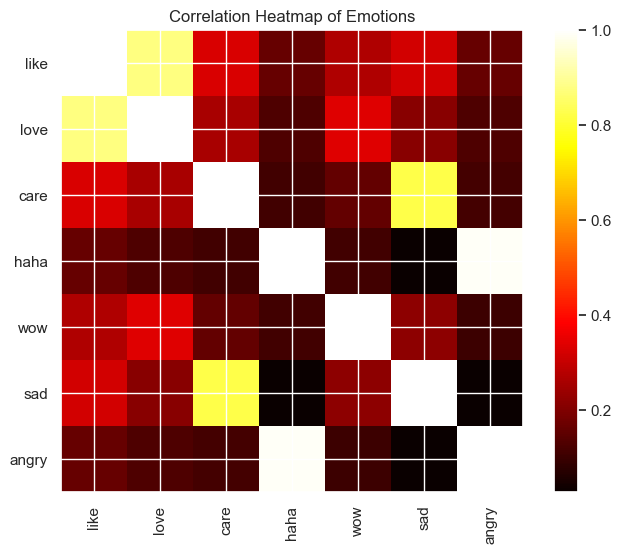

In [1517]:

# Tạo dataframe mới chỉ chứa cột cảm xúc
emotions = ['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']
emotion_data = data[emotions]

# Tính ma trận tương quan
correlation_matrix = emotion_data.corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(emotions)), emotions, rotation=90)
plt.yticks(range(len(emotions)), emotions)
plt.title('Correlation Heatmap of Emotions')
plt.show()

Thời gian đăng bài trong tuần

In [1519]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['week_day'] = data['time'].dt.weekday

# Tính số lượng bài viết mỗi ngày trong tuần
post_counts = data['week_day'].value_counts().sort_index()

# Tạo đối tượng hình và trục
fig, ax = plt.subplots(figsize=(16, 8))

# Vẽ biểu đồ cột
bars = ax.bar(post_counts.index, post_counts.values, color='skyblue')

# Đặt tiêu đề và nhãn trục
ax.set_title('Number of Posts per Day of the Week', fontsize=18)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Number of Posts', fontsize=14)

# Thêm nhãn vào từng cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom', fontsize=12)

# Đặt nhãn đánh dấu trên trục x
ax.set_xticks(post_counts.index)
ax.set_xticklabels(weekdays)
ax.tick_params(axis='both', labelsize=12)

# Hiển thị biểu đồ
plt.show()

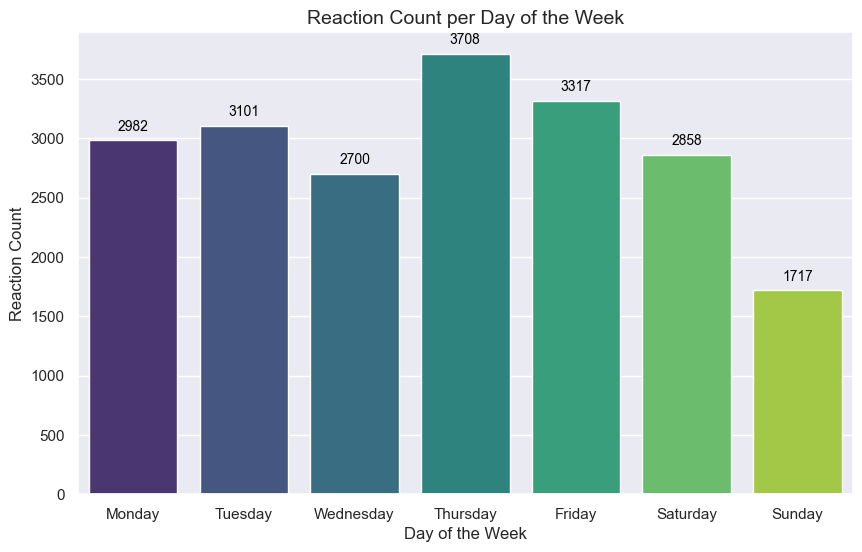

In [1538]:
#Chuyển đổi cột 'time' sang định dạng datetime
data['time'] = pd.to_datetime(data['time'])

# Nhóm dữ liệu theo ngày trong tuần và tính tổng số reaction
reaction_counts = data.groupby(data['time'].dt.day_name())['reaction_count'].sum()

# Xác định thứ tự các ngày trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sắp xếp reaction_count dựa trên thứ tự đã xác định
reaction_counts_sorted = reaction_counts.reindex(day_order)

# Vẽ biểu đồ số lượng reaction mỗi ngày trong tuần
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=reaction_counts_sorted.index, y=reaction_counts_sorted.values, hue=reaction_counts_sorted.index, palette='viridis', dodge=False, legend=False)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Reaction Count', fontsize=12)
plt.title('Reaction Count per Day of the Week', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.show()

In [1593]:
# Tìm 3 bài đăng có số lượng reaction thấp nhất
posts_with_lowest_reactions = data.nsmallest(3, 'reaction_count')

# In ra một số thông tin cần thiết về các bài đăng có số lượng reaction thấp nhất
for i, post in posts_with_lowest_reactions.iterrows():
    print(f"\nPost with the {i+1}st lowest number of reactions:")
    print("Post Text:", post["post_text"])
    print("Time:", post["time"])
    print("Post URL:", post["post_url"])
    print("Likes:", post["like"])
    print("Haha Reactions:", post["haha"])
    print("Care Reactions:", post["care"])
    print("love Reactions:", post["love"])
    print("Angry Reactions:", post["angry"])
    print("Sad Reactions:", post["sad"])
    print("Comments:", post["comments"])
    print("Shares:", post["shares"])


Post with the 244st lowest number of reactions:
Post Text: If you love books about adventures on boats, plane, trains, and automobiles - this roundup's for you.
https://amzn.to/3LaDy24
Time: 2022-03-23 14:58:58
Post URL: https://facebook.com/Kindle/posts/10159993610536558
Likes: 18
Haha Reactions: 0
Care Reactions: 0
love Reactions: 0
Angry Reactions: 0
Sad Reactions: 0
Comments: 2
Shares: 3

Post with the 125st lowest number of reactions:
Post Text: Whatever your flavor of choice: espionage or action adventure, some of the best page to screen adaptations of summer are coming to your living room.
https://amzn.to/3Jud24l
Time: 2022-08-07 17:46:00
Post URL: https://facebook.com/Kindle/posts/10160254430481558
Likes: 17
Haha Reactions: 0
Care Reactions: 0
love Reactions: 0
Angry Reactions: 1
Sad Reactions: 0
Comments: 7
Shares: 1

Post with the 249st lowest number of reactions:
Post Text: With the new Showtime adaptation of Mike Isaac’s book, "Super Pumped: The Battle for Uber" getting a 

In [1596]:
# Chọn những bài đăng có lượt tương tác thấp nhất trong ngày thứ 4
lowest_interaction_posts_wednesday = data[data['time'].dt.day_name() == 'Wednesday'].nsmallest(3, 'reaction_count')

# In thông tin về những bài đăng này
print("\nPosts with lowest interactions on Wednesday:")
for index, post in lowest_interaction_posts_wednesday.iterrows():
    print("\nPost Text:", post["post_text"])
    print("Time:", post["time"])
    print("Post URL:", post["post_url"])
    print("Likes:", post["like"])
    print("Haha Reactions:", post["haha"])
    print("Care Reactions:", post["care"])
    print("Love Reactions:", post["love"])
    print("Angry Reactions:", post["angry"])
    print("Sad Reactions:", post["sad"])
    print("Comments:", post["comments"])
    print("Shares:", post["shares"])
    print("============================")



Posts with lowest interactions on Wednesday:

Post Text: If you love books about adventures on boats, plane, trains, and automobiles - this roundup's for you.
https://amzn.to/3LaDy24
Time: 2022-03-23 14:58:58
Post URL: https://facebook.com/Kindle/posts/10159993610536558
Likes: 18
Haha Reactions: 0
Care Reactions: 0
Love Reactions: 0
Angry Reactions: 0
Sad Reactions: 0
Comments: 2
Shares: 3

Post Text: The Hills Have Fries, anyone? From 🍟 to 🍸and everywhere in between, dive into the world of scary good vegan cooking (inspired by horror movie classics) with Death for Dinner by Zach Neil! https://amzn.to/3TWDCHh
Time: 2022-10-26 15:00:01
Post URL: https://facebook.com/Kindle/posts/10160416940331558
Likes: 19
Haha Reactions: 0
Care Reactions: 0
Love Reactions: 0
Angry Reactions: 0
Sad Reactions: 0
Comments: 7
Shares: 7

Post Text: Looking for one good read this week? Here are a few the Amazon Book Review editors think you should check out.
https://amzn.to/3Da3jwW
Time: 2022-03-23 17:02:03

In [1520]:
# Trích xuất hour từ cột time
data['hour'] = data['time'].dt.hour

# Đếm tần số mỗi giờ
hour_counts = data['hour'].value_counts()

# Vẽ ra những giờ phổ biến nhất để đăng bài
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Most Common Hours for Posting')
plt.ylabel('Number of posts')
plt.xlabel('Hour')

# hiển thị biểu đồ
plt.show()



In [1387]:
#in ra tỉ lệ các kiểu tương tác
print(data[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care']].corrwith(data['shares']))

like     0.743919
love     0.689534
haha     0.100871
wow      0.476993
sad      0.337942
angry    0.095397
care     0.351423
dtype: float64


# Xử lý dữ liệu từng loại reaction

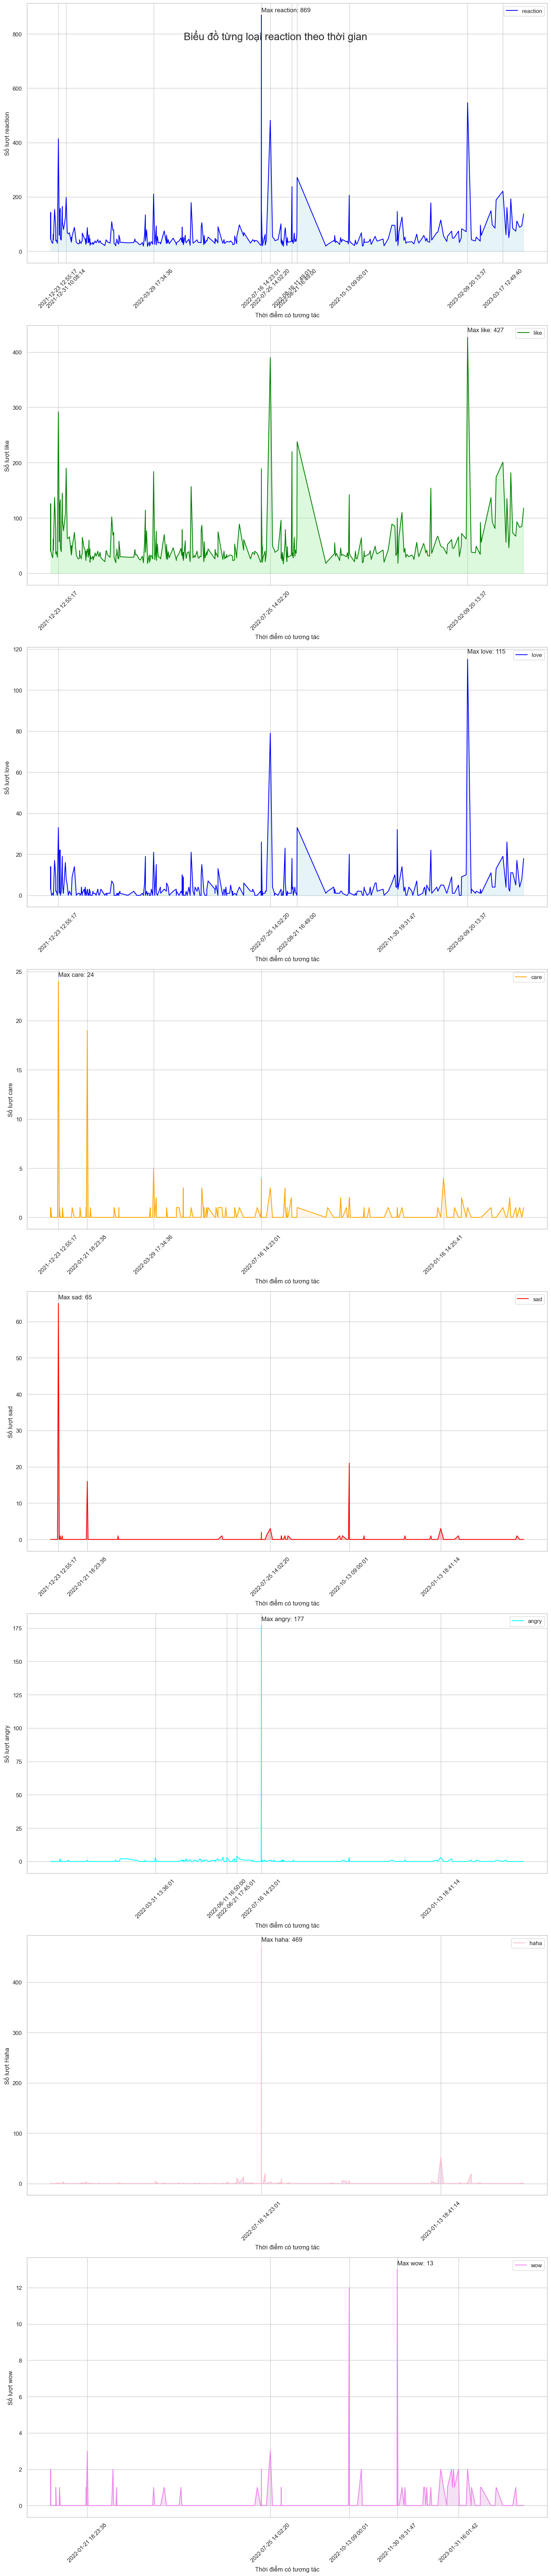

In [1601]:

# Vẽ dữ liệu
fig, (ax8, ax1, ax2, ax3, ax5, ax6, ax7, ax4) = plt.subplots(8, 1, figsize=(15, 70))

ax1.plot(data['time'], data['like'], label='like', color='green')
ax1.fill_between(data['time'], data['like'], color='lightgreen', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
ax1.legend()
ax1.set_xlabel('Thời điểm có tương tác')
ax1.set_ylabel('Số lượt like')

ax2.plot(data['time'], data['love'], label='love', color='blue')
ax2.fill_between(data['time'], data['love'], color='lightblue', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
ax2.legend()
ax2.set_xlabel('Thời điểm có tương tác')
ax2.set_ylabel('Số lượt love')

ax3.plot(data['time'], data['care'], label='care', color='orange')
ax3.fill_between(data['time'], data['care'], color='moccasin', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax3.xaxis.set_major_locator(plt.MaxNLocator(7))
ax3.legend()
ax3.set_xlabel('Thời điểm có tương tác')
ax3.set_ylabel('Số lượt care')

ax4.plot(data['time'], data['wow'], label='wow', color='violet')
ax4.fill_between(data['time'], data['wow'], color='plum', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax4.xaxis.set_major_locator(plt.MaxNLocator(7))
ax4.legend()
ax4.set_xlabel('Thời điểm có tương tác')
ax4.set_ylabel('Số lượt wow')

ax5.plot(data['time'], data['sad'], label='sad', color='red')
ax5.fill_between(data['time'], data['sad'], color='indianred', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax5.xaxis.set_major_locator(plt.MaxNLocator(7))
ax5.legend()
ax5.set_xlabel('Thời điểm có tương tác')
ax5.set_ylabel('Số lượt sad')

ax6.plot(data['time'], data['angry'], label='angry', color='aqua')
ax6.fill_between(data['time'], data['angry'], color='lightcyan', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax6.xaxis.set_major_locator(plt.MaxNLocator(7))
ax6.legend()
ax6.set_xlabel('Thời điểm có tương tác')
ax6.set_ylabel('Số lượt angry')

ax7.plot(data['time'], data['haha'], label='haha', color='pink')
ax7.fill_between(data['time'], data['haha'], color='plum', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax7.xaxis.set_major_locator(plt.MaxNLocator(7))
ax7.legend()
ax7.set_xlabel('Thời điểm có tương tác')
ax7.set_ylabel('Số lượt Haha')

ax8.plot(data['time'], data['reaction_count'], label='reaction', color='blue')
ax8.fill_between(data['time'], data['reaction_count'], color='lightblue', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax8.xaxis.set_major_locator(plt.MaxNLocator(7))
ax8.legend()
ax8.set_xlabel('Thời điểm có tương tác')
ax8.set_ylabel('Số lượt reaction')

# Lưu lại các giá trị tối đa
max_like_idx = data['like'].idxmax()
max_love_idx = data['love'].idxmax()
max_care_idx = data['care'].idxmax()
max_wow_idx = data['wow'].idxmax()
max_sad_idx = data['sad'].idxmax()
max_angry_idx = data['angry'].idxmax()
max_haha_idx = data['haha'].idxmax()
max_reaction_idx = data['reaction_count'].idxmax()

ax1.annotate(f'Max like: {data.at[max_like_idx, "like"]}', xy=(data.at[max_like_idx, "time"], data.at[max_like_idx, "like"]), xytext=(data.at[max_like_idx, "time"], data.at[max_like_idx, "like"]+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax2.annotate(f'Max love: {data.at[max_love_idx, "love"]}', xy=(data.at[max_love_idx, "time"], data.at[max_love_idx, "love"]), xytext=(data.at[max_love_idx, "time"], data.at[max_love_idx, "love"]+3),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax3.annotate(f'Max care: {data.at[max_care_idx, "care"]}', xy=(data.at[max_care_idx, "time"], data.at[max_care_idx, "care"]), xytext=(data.at[max_care_idx, "time"], data.at[max_care_idx, "care"]+0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax4.annotate(f'Max wow: {data.at[max_wow_idx, "wow"]}', xy=(data.at[max_wow_idx, "time"], data.at[max_wow_idx, "wow"]), xytext=(data.at[max_wow_idx, "time"], data.at[max_wow_idx, "wow"]+0.25),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax5.annotate(f'Max sad: {data.at[max_sad_idx, "sad"]}', xy=(data.at[max_sad_idx, "time"], data.at[max_sad_idx, "sad"]), xytext=(data.at[max_sad_idx, "time"], data.at[max_sad_idx, "sad"]+1.25),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax6.annotate(f'Max angry: {data.at[max_angry_idx, "angry"]}', xy=(data.at[max_angry_idx, "time"], data.at[max_angry_idx, "angry"]), xytext=(data.at[max_angry_idx, "time"], data.at[max_angry_idx, "angry"]+3.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax7.annotate(f'Max haha: {data.at[max_haha_idx, "haha"]}', xy=(data.at[max_haha_idx, "time"], data.at[max_haha_idx, "haha"]), xytext=(data.at[max_haha_idx, "time"], data.at[max_haha_idx, "haha"]+12),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax8.annotate(f'Max reaction: {data.at[max_reaction_idx, "reaction_count"]}', xy=(data.at[max_reaction_idx, "time"], data.at[max_reaction_idx, "reaction_count"]), xytext=(data.at[max_reaction_idx, "time"], data.at[max_reaction_idx, "reaction_count"]+12),
             arrowprops=dict(facecolor='black', arrowstyle='->'))


# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt like lớn nhất 
top_3_like = np.argsort(data['like'])[-3:]
top_3_like_dates = [x[i] for i in top_3_like]
xticks_labels = top_3_like_dates
ax1.set_xticks(xticks_labels)
ax1.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt love lớn nhất 
top_5_love = np.argsort(data['love'])[-5:]
top_5_love_dates = [x[i] for i in top_5_love]
xticks_labels = top_5_love_dates
ax2.set_xticks(xticks_labels)
ax2.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt care lớn nhất 
top_5_care = np.argsort(data['care'])[-5:]
top_5_care_dates = [x[i] for i in top_5_care]
xticks_labels = top_5_care_dates
ax3.set_xticks(xticks_labels)
ax3.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt wow lớn nhất 
top_5_wow = np.argsort(data['wow'])[-5:]
top_5_wow_dates = [x[i] for i in top_5_wow]
xticks_labels = top_5_wow_dates
ax4.set_xticks(xticks_labels)
ax4.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt sad lớn nhất 
top_5_sad = np.argsort(data['sad'])[-5:]
top_5_sad_dates = [x[i] for i in top_5_sad]
xticks_labels = top_5_sad_dates
ax5.set_xticks(xticks_labels)
ax5.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt angry lớn nhất 
top_5_angry = np.argsort(data['angry'])[-5:]
top_5_angry_dates = [x[i] for i in top_5_angry]
xticks_labels = top_5_angry_dates
ax6.set_xticks(xticks_labels)
ax6.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt haha lớn nhất 
top_2_haha = np.argsort(data['haha'])[-2:]
top_2_haha_dates = [x[i] for i in top_2_haha]
xticks_labels = top_2_haha_dates
ax7.set_xticks(xticks_labels)
ax7.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt reaction lớn nhất 
top_10_reaction = np.argsort(data['reaction_count'])[-10:]
top_10_reaction_dates = [x[i] for i in top_10_reaction]
xticks_labels = top_10_reaction_dates
ax8.set_xticks(xticks_labels)
ax8.set_xticklabels(xticks_labels, rotation=45)

plt.suptitle('Biểu đồ từng loại reaction theo thời gian', fontsize=20)
plt.tight_layout()
plt.show()

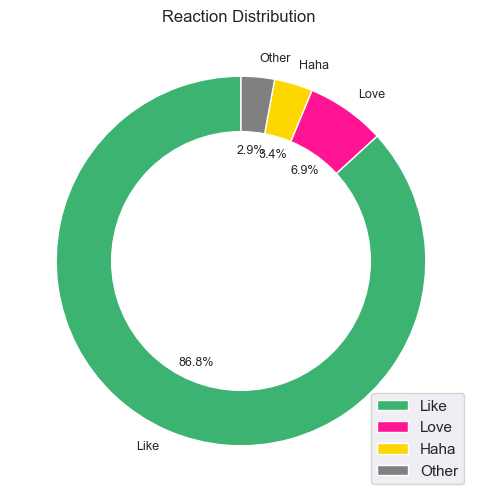

In [1575]:
# Lấy số lượng từng loại reaction dưới dạng danh sách
reactions = ['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']
reaction_counts = [data[reaction].sum() for reaction in reactions]

# Tính tỷ lệ phần trăm
total_reaction_count = sum(reaction_counts)
percentages = [count / total_reaction_count * 100 for count in reaction_counts]

# Xác định ngưỡng để coi một lát đồ thị là "nhỏ"
threshold = 5  # Tỷ lệ phần trăm

# Nhóm các lát nhỏ thành một lát "other" nếu tổng tỷ lệ phần trăm của chúng dưới ngưỡng
small_percentage = sum(percentages[3:7])
if small_percentage < threshold:
    other_percentage = small_percentage
    percentages[3:7] = [0, 0, 0, 0]
else:
    other_percentage = 0

# Tạo biểu đồ hình tròn
labels = ['Like', 'Love', 'Haha', 'Other']
colors = ['#3CB371', '#FF1493', '#FFD700', '#808080']  # Màu sắc tùy chỉnh cho từng lát
plt.figure(figsize=(10, 6))
pie = plt.pie(percentages[:3] + [other_percentage], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9})
plt.title("Reaction Distribution ")

# Thêm hiệu ứng đổ bóng vào biểu đồ hình tròn
plt.gca().set_aspect('equal')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

# Di chuyển chú giải xuống góc dưới bên phải
plt.legend(pie[0], labels, loc='lower right')

plt.show()

3 bài đăng có lượt like cao nhất

In [1591]:
# Sắp xếp dữ liệu theo cột 'wow' theo thứ tự giảm dần
sorted_data = data.sort_values(by="wow", ascending=False)

# Truy xuất bài đăng có số lượng wow cao nhất
post_with_highest_wow = sorted_data.iloc[0]

# Truy xuất bài đăng có số lượng wow cao thứ hai
post_with_second_highest_wow = sorted_data.iloc[1]


# In thông tin về bài viết có số lượng wow cao nhất
print("Post with the highest number of wow reactions:")
print("Post Text:", post_with_highest_wow["post_text"])
print("Time:", post_with_highest_wow["time"])
print("Post URL:", post_with_highest_wow["post_url"])
print("Likes:", post_with_highest_wow["like"])
print("Haha Reactions:", post_with_highest_wow["haha"])
print("Care Reactions:", post_with_highest_wow["care"])
print("Love Reactions:", post_with_highest_wow["love"])
print("Angry Reactions:", post_with_highest_wow["angry"])
print("Sad Reactions:", post_with_highest_wow["sad"])
print("Comments:", post_with_highest_wow["comments"])
print("Shares:", post_with_highest_wow["shares"])

# In thông tin về bài viết có số lượng wow thứ hai
print("\nPost with the second-highest number of wow reactions:")
print("Post Text:", post_with_second_highest_wow["post_text"])
print("Time:", post_with_second_highest_wow["time"])
print("Post URL:", post_with_second_highest_wow["post_url"])
print("Likes:", post_with_second_highest_wow["like"])
print("Haha Reactions:", post_with_second_highest_wow["haha"])
print("Care Reactions:", post_with_second_highest_wow["care"])
print("Love Reactions:", post_with_second_highest_wow["love"])
print("Angry Reactions:", post_with_second_highest_wow["angry"])
print("Sad Reactions:", post_with_second_highest_wow["sad"])
print("Comments:", post_with_second_highest_wow["comments"])
print("Shares:", post_with_second_highest_wow["shares"])


Post with the highest number of wow reactions:
Post Text: Plot twist. Read AND write on it. Kindle Scribe can do more for you than ever before. https://amzn.to/3FhJrKE
Time: 2022-11-30 19:31:47
Post URL: https://facebook.com/Kindle/posts/10160568294136558
Likes: 100
Haha Reactions: 0
Care Reactions: 1
Love Reactions: 32
Angry Reactions: 0
Sad Reactions: 0
Comments: 77
Shares: 48

Post with the second-highest number of wow reactions:
Post Text: See our editors’ picks for the top banned titles you should add to your reading list this week 📖https://amzn.to/3yAgzJW
Time: 2022-10-13 09:00:01
Post URL: https://facebook.com/Kindle/posts/10160379927546558
Likes: 142
Haha Reactions: 6
Care Reactions: 2
Love Reactions: 20
Angry Reactions: 3
Sad Reactions: 21
Comments: 277
Shares: 34


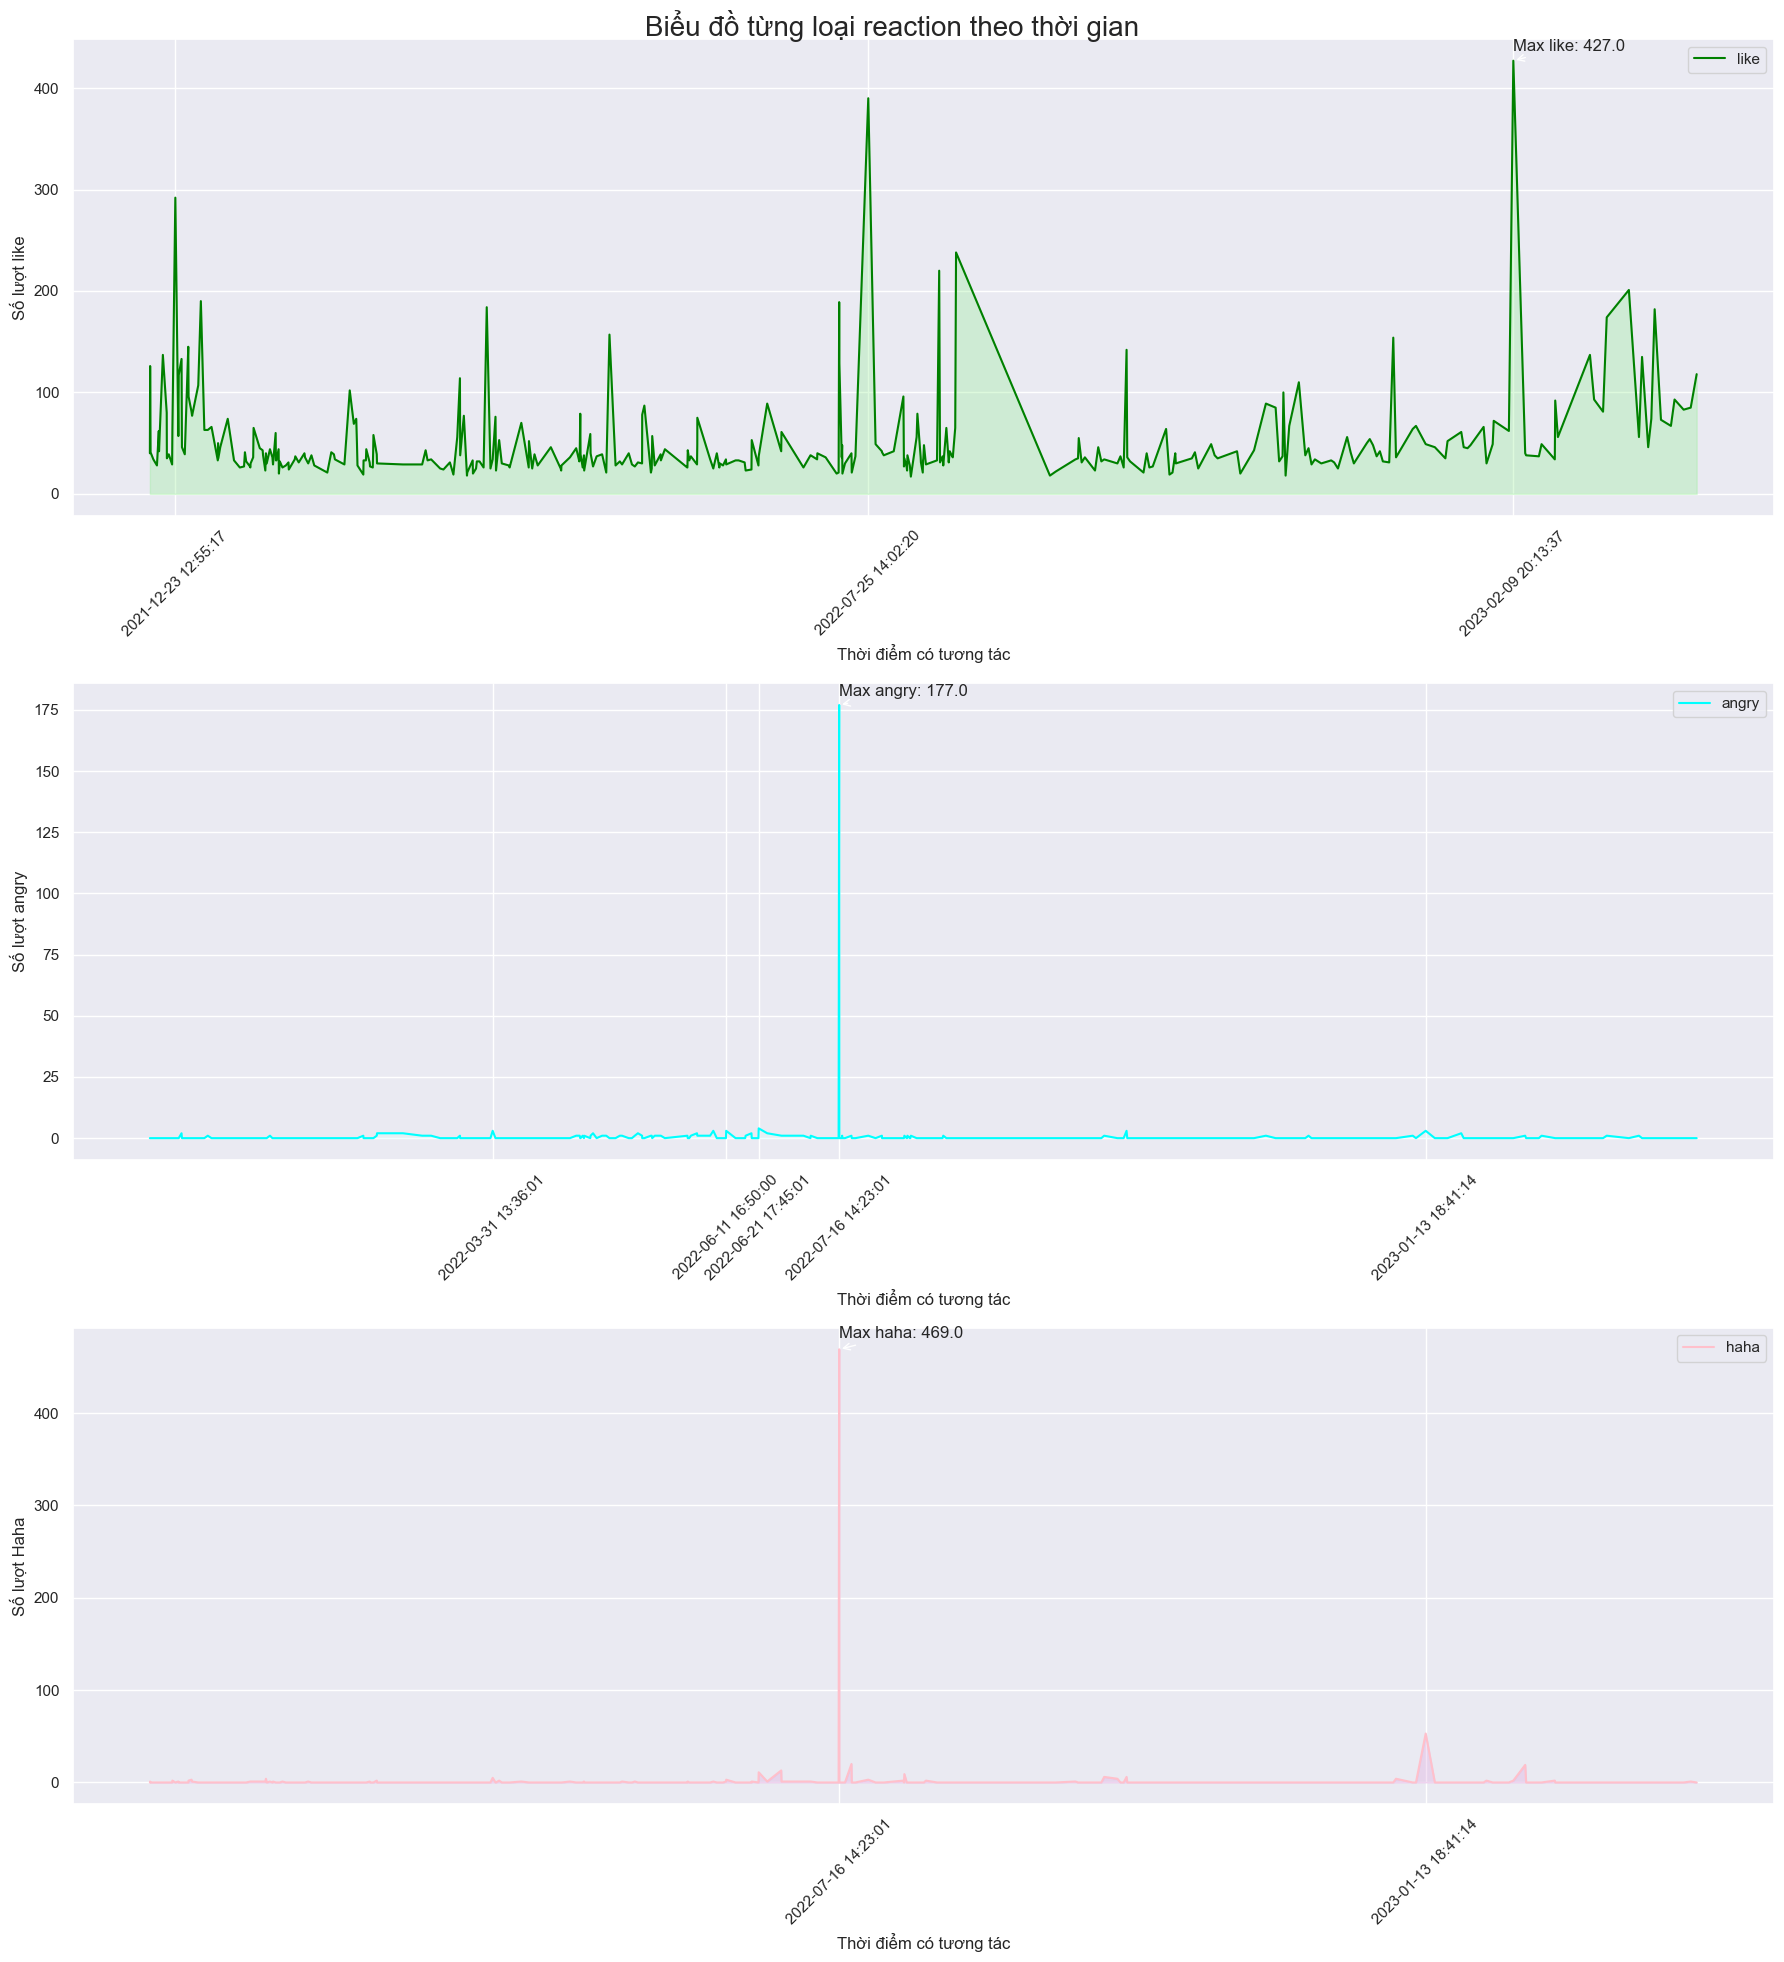

In [1396]:

# Vẽ dữ liệu
fig, (ax1, ax6, ax7) = plt.subplots(3, 1, figsize=(18, 20))

ax1.plot(data['time'], data['like'], label='like', color='green')
ax1.fill_between(data['time'], data['like'], color='lightgreen', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
ax1.legend()
ax1.set_xlabel('Thời điểm có tương tác')
ax1.set_ylabel('Số lượt like')

ax6.plot(data['time'], data['angry'], label='angry', color='aqua')
ax6.fill_between(data['time'], data['angry'], color='lightcyan', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax6.xaxis.set_major_locator(plt.MaxNLocator(7))
ax6.legend()
ax6.set_xlabel('Thời điểm có tương tác')
ax6.set_ylabel('Số lượt angry')

ax7.plot(data['time'], data['haha'], label='haha', color='pink')
ax7.fill_between(data['time'], data['haha'], color='plum', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax7.xaxis.set_major_locator(plt.MaxNLocator(7))
ax7.legend()
ax7.set_xlabel('Thời điểm có tương tác')
ax7.set_ylabel('Số lượt Haha')

# Lưu lại các giá trị tối đa
max_like_idx = data['like'].idxmax()
max_angry_idx = data['angry'].idxmax()
max_haha_idx = data['haha'].idxmax()

ax1.annotate(f'Max like: {data.at[max_like_idx, "like"]}', xy=(data.at[max_like_idx, "time"], data.at[max_like_idx, "like"]), xytext=(data.at[max_like_idx, "time"], data.at[max_like_idx, "like"]+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax6.annotate(f'Max angry: {data.at[max_angry_idx, "angry"]}', xy=(data.at[max_angry_idx, "time"], data.at[max_angry_idx, "angry"]), xytext=(data.at[max_angry_idx, "time"], data.at[max_angry_idx, "angry"]+3.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax7.annotate(f'Max haha: {data.at[max_haha_idx, "haha"]}', xy=(data.at[max_haha_idx, "time"], data.at[max_angry_idx, "haha"]), xytext=(data.at[max_haha_idx, "time"], data.at[max_haha_idx, "haha"]+12),
             arrowprops=dict(facecolor='black', arrowstyle='->'))



# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt like lớn nhất 
top_3_like = np.argsort(data['like'])[-3:]
top_3_like_dates = [x[i] for i in top_3_like]
xticks_labels = top_3_like_dates
ax1.set_xticks(xticks_labels)
ax1.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt angry lớn nhất 
top_5_angry = np.argsort(data['angry'])[-5:]
top_5_angry_dates = [x[i] for i in top_5_angry]
xticks_labels = top_5_angry_dates
ax6.set_xticks(xticks_labels)
ax6.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt haha lớn nhất 
top_2_haha = np.argsort(data['haha'])[-2:]
top_2_haha_dates = [x[i] for i in top_2_haha]
xticks_labels = top_2_haha_dates
ax7.set_xticks(xticks_labels)
ax7.set_xticklabels(xticks_labels, rotation=45)

plt.suptitle('Biểu đồ từng loại reaction theo thời gian', fontsize=20)
plt.tight_layout()
plt.show()

In [1473]:
# Tìm bài đăng có số lượng angry cao nhất
post_with_highest_angry = data.loc[data['angry'].idxmax()]

# In một số thông tin cần thiết về bài đăng có số lượng angry cao nhất
print("\nPost with the highest number of angry reactions:")
print("Post Text:", post_with_highest_angry["post_text"])
print("Time:", post_with_highest_angry["time"])
print("Post URL:", post_with_highest_angry["post_url"])
print("Likes:", post_with_highest_angry["like"])
print("Haha Reactions:", post_with_highest_angry["haha"])
print("Angry Reactions:", post_with_highest_angry["angry"])
print("Comments:", post_with_highest_angry["comments"])
print("Shares:", post_with_highest_angry["shares"])


Post with the highest number of angry reactions:
Post Text: Star athlete and activist Colin Kaepernick shares what books he's read and loved lately and why he chose them.
https://amzn.to/3aGnzwj
Time: 2022-07-16 14:23:01
Post URL: https://facebook.com/Kindle/posts/10160218112901558
Likes: 189.0
Haha Reactions: 469.0
Angry Reactions: 177.0
Comments: 1600
Shares: 18


In [1602]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1603]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VuHieu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1604]:
import nltk
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Khởi tạo SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Tải dữ liệu comments từ tệp CSV
comments_str = post_with_highest_angry['comments_full']

# Sử dụng re.findall để trích xuất thông tin comment_text từ chuỗi
comment_text_data = re.findall(r"'comment_text': '(.*?)'", comments_str)

# Kết hợp tất cả dữ liệu comment_text thành một chuỗi
text = ' '.join(comment_text_data)

# Token hóa văn bản thành các câu riêng biệt
sentences = sent_tokenize(text)

# Thực hiện phân tích cảm xúc trên mỗi câu
sentiments = []
for sentence in sentences:
    sentiment_score = sia.polarity_scores(sentence)
    sentiment = 'Positive' if sentiment_score['compound'] >= 0 else 'Negative'
    sentiments.append(sentiment)

# Tạo một DataFrame mới với kết quả phân tích câu và cảm xúc
data_with_sentiment = pd.DataFrame({'sentence': sentences, 'sentiment': sentiments})

# In DataFrame với kết quả phân tích câu và cảm xúc
print(data_with_sentiment)

                                              sentence sentiment
0                      He needs to read Thomas Sowell.  Positive
1    ;) Rick Reynolds Best comment of the day!!!!!!...  Positive
2                               Kevin Gill Not really.  Positive
3    I think everyone would benefit from reading Th...  Positive
4    Chris Conrad, indoubtedly one of the most bril...  Positive
..                                                 ...       ...
760                           Who cares what he reads!  Positive
761                                      He’s a loser.  Negative
762                        Chris Ward a falling star!!  Negative
763                                             Loser!  Negative
764                               He needs to go away.  Positive

[765 rows x 2 columns]


In [1605]:
# Tạo DataFrame từ comment_text_data
comments_df = pd.DataFrame({'comment_text': comment_text_data})

# Thêm cột 'sentiment' vào DataFrame
comments_df['sentiment'] = comments_df['comment_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Lấy top 5 bình luận tích cực nhất và top 5 bình luận tiêu cực nhất
top_positive_comments = comments_df.nlargest(5, 'sentiment')['comment_text'].tolist()
top_negative_comments = comments_df.nsmallest(5, 'sentiment')['comment_text'].tolist()

# In ra top 5 bình luận tích cực nhất
print("Top 5 Bình Luận Tích Cực Nhất:")
for i, comment in enumerate(top_positive_comments, 1):
    print(f"{i}. {comment}")

# In ra top 5 bình luận tiêu cực nhất
print("\nTop 5 Bình Luận Tiêu Cực Nhất:")
for i, comment in enumerate(top_negative_comments, 1):
    print(f"{i}. {comment}")

Top 5 Bình Luận Tích Cực Nhất:
1. Richard Thomas Have you done any traveling outside the Country? Have you been to any of the Countries in Asia & experienced or saw what & how the people live there? I have & you know something, every time I come back home, I’m GRATEFUL that I live in this Country & totally respect what we, as the US, used to stand for …… UNITY, INTEGRITY,STREN\nGTH & HONOR only bc of those that lost their lives could help to make our Country UNIFIED, INDEPENDENT & STRONG in our beliefs & to retain our individual freedoms not like it is now.
2. Drop him, Amazon. I know you have woke people to pacify (you really don’t), but this doesn’t play well. America at large doesn’t like or respect this man. He’s entitled and ungrateful.\n\nYou really can just sell products, I promise. Most folks would much rather buy from people who aren’t pushing an agenda.
3. HA, HA HA HA HA. Really?
4. Shari Zimmerman I believe in freedom and not forcing my beliefs on others. Unbelievable how m

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

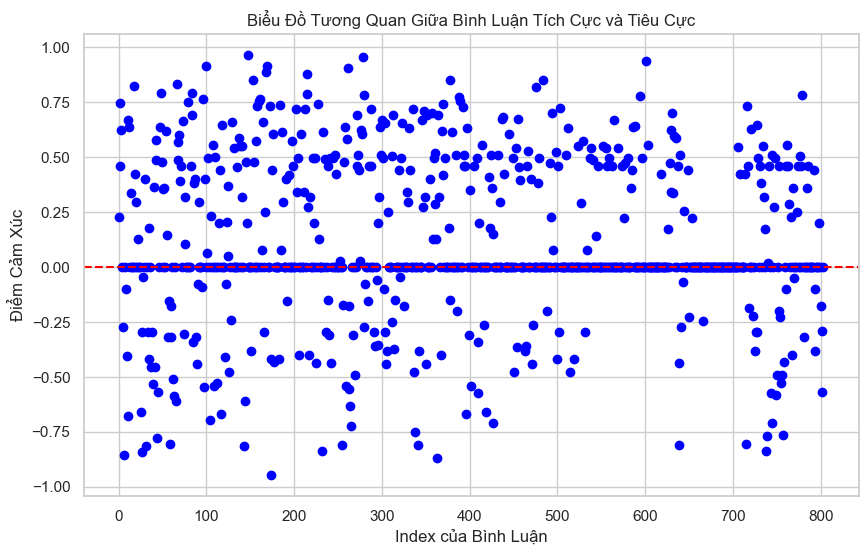

In [1606]:

# Tạo biểu đồ tương quan giữa bình luận tích cực và bình luận tiêu cực
plt.figure(figsize=(10, 6))
plt.scatter(comments_df.index, comments_df['sentiment'], color='blue', label='Sentiment Score')
plt.title('Biểu Đồ Tương Quan Giữa Bình Luận Tích Cực và Tiêu Cực')
plt.xlabel('Index của Bình Luận')
plt.ylabel('Điểm Cảm Xúc')
plt.axhline(y=0, color='red', linestyle='--', label='Ngưỡng Tích Cực/Tiêu Cực')
plt.legend

Trong biểu đồ này, mỗi điểm trên trục x tương ứng với một bình luận và trục y là điểm cảm xúc của bình luận đó. Đường ngang màu đỏ ở giữa biểu đồ là ngưỡng giữa tích cực và tiêu cực (điểm 0).

In [1607]:
# Tính tỷ lệ bình luận tích cực và tiêu cực
positive_ratio = (comments_df['sentiment'] >= 0).sum() / len(comments_df)
negative_ratio = 1 - positive_ratio

# Tạo biểu đồ tròn
labels = ['Positive', 'Negative']
sizes = [positive_ratio, negative_ratio]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Đặt nổi bật mảnh 'Positive'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Tỷ Lệ Bình Luận Tích Cực và Tiêu Cực')
plt.show()

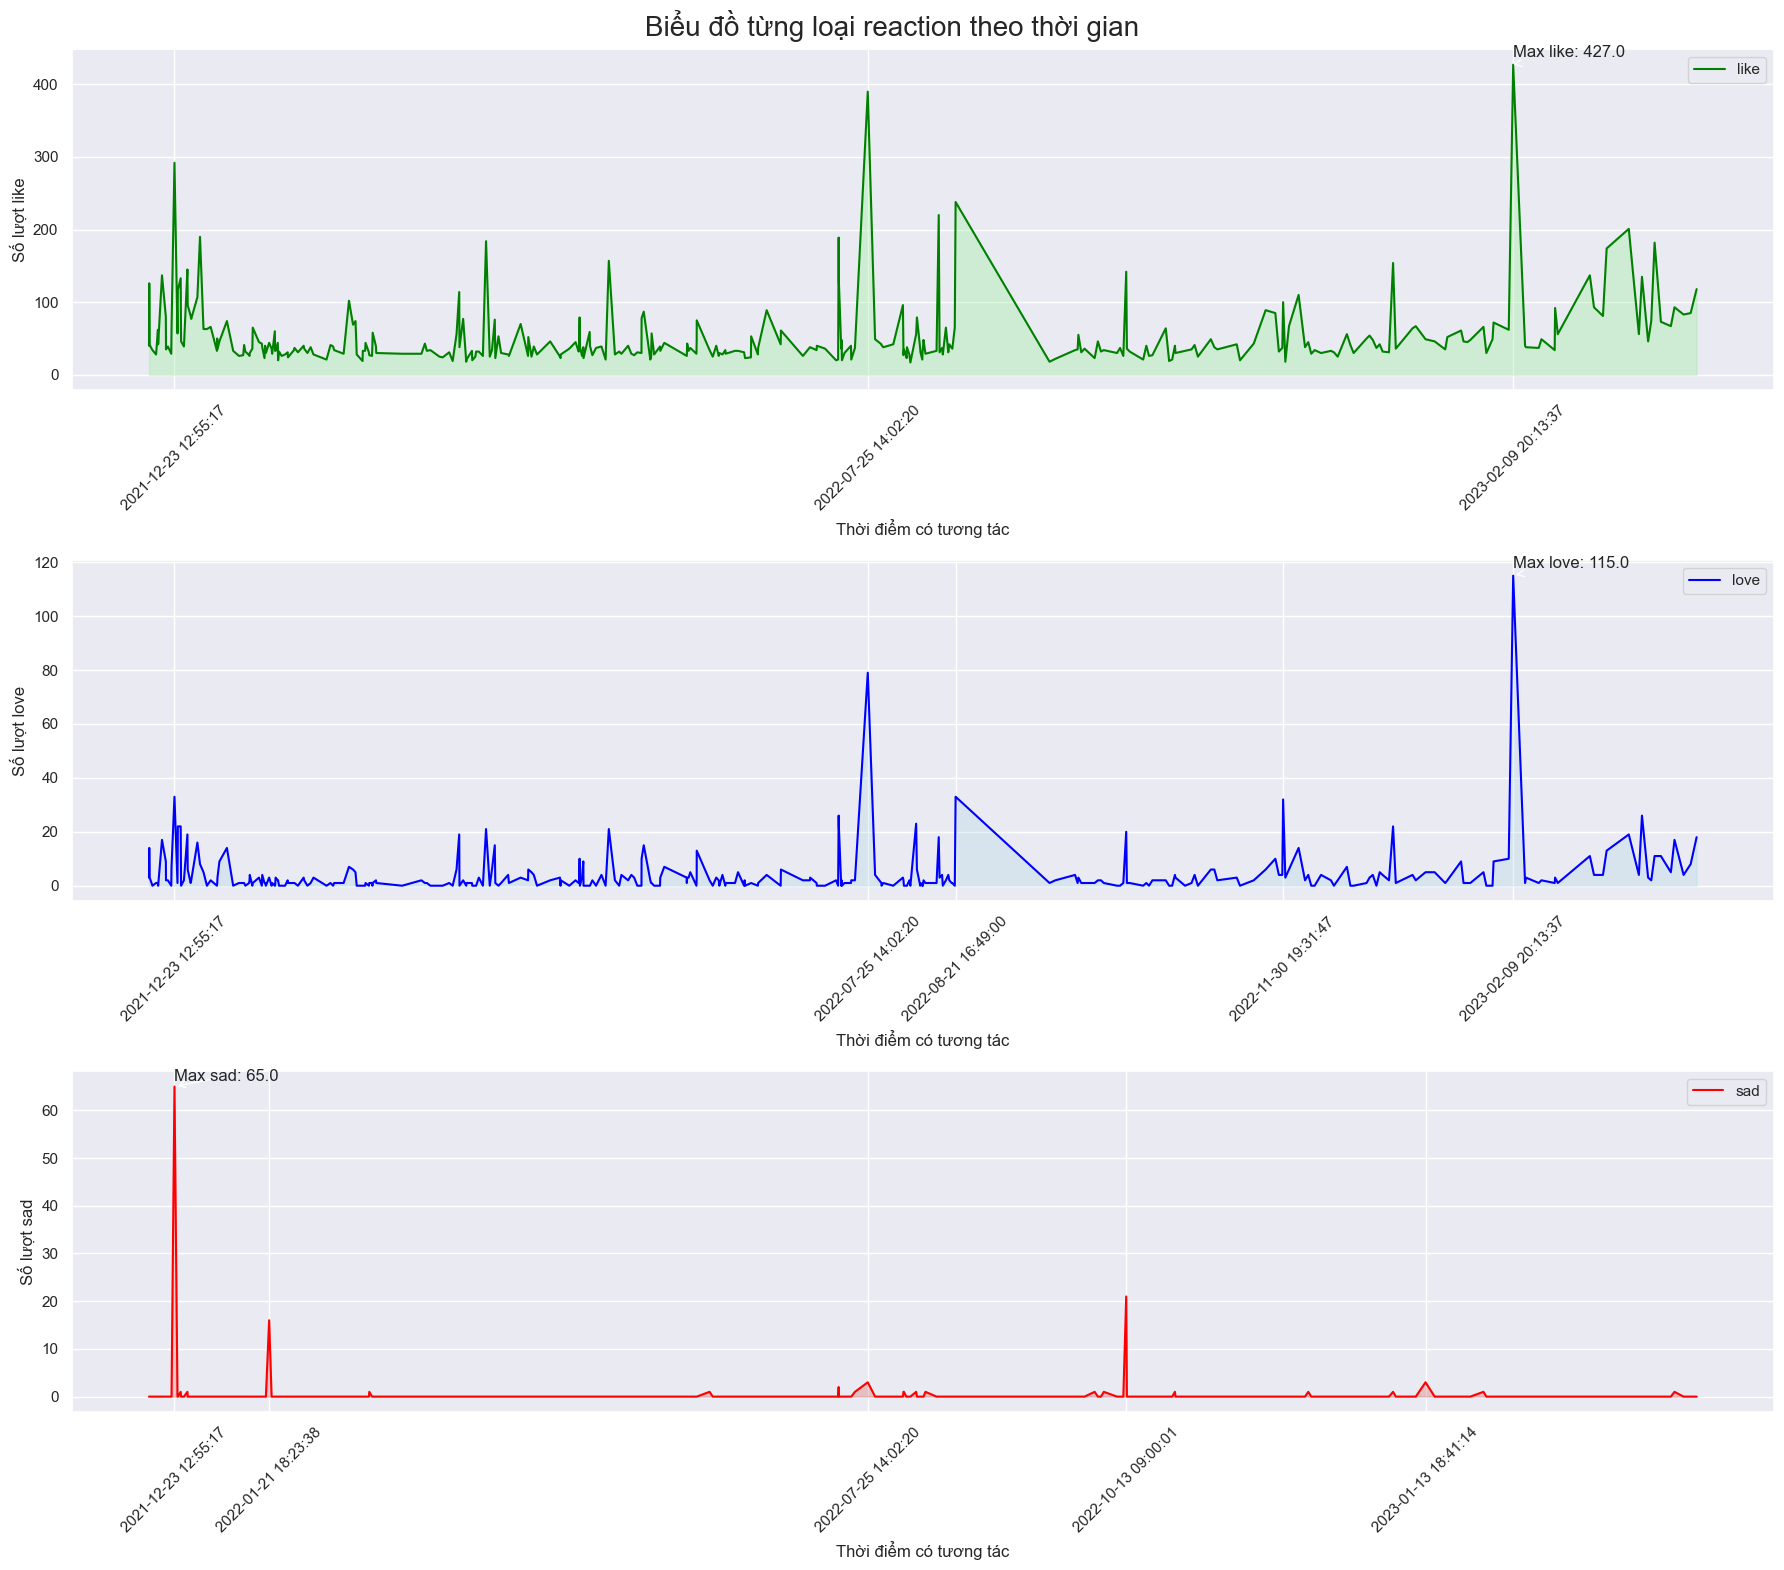

In [1405]:

# Vẽ dữ liệu
fig, (ax1, ax2, ax5) = plt.subplots(3, 1, figsize=(18, 16))

ax1.plot(data['time'], data['like'], label='like', color='green')
ax1.fill_between(data['time'], data['like'], color='lightgreen', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
ax1.legend()
ax1.set_xlabel('Thời điểm có tương tác')
ax1.set_ylabel('Số lượt like')

ax2.plot(data['time'], data['love'], label='love', color='blue')
ax2.fill_between(data['time'], data['love'], color='lightblue', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
ax2.legend()
ax2.set_xlabel('Thời điểm có tương tác')
ax2.set_ylabel('Số lượt love')

ax5.plot(data['time'], data['sad'], label='sad', color='red')
ax5.fill_between(data['time'], data['sad'], color='indianred', alpha=0.3)  # Thêm màu vào phần diện tích giữa đồ thị và trục thời gian
ax5.xaxis.set_major_locator(plt.MaxNLocator(7))
ax5.legend()
ax5.set_xlabel('Thời điểm có tương tác')
ax5.set_ylabel('Số lượt sad')


# Lưu lại các giá trị tối đa
max_like_idx = data['like'].idxmax()
max_love_idx = data['love'].idxmax()
max_sad_idx = data['sad'].idxmax()

ax1.annotate(f'Max like: {data.at[max_like_idx, "like"]}', xy=(data.at[max_like_idx, "time"], data.at[max_like_idx, "like"]), xytext=(data.at[max_like_idx, "time"], data.at[max_like_idx, "like"]+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax2.annotate(f'Max love: {data.at[max_love_idx, "love"]}', xy=(data.at[max_love_idx, "time"], data.at[max_love_idx, "love"]), xytext=(data.at[max_love_idx, "time"], data.at[max_love_idx, "love"]+3),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax5.annotate(f'Max sad: {data.at[max_sad_idx, "sad"]}', xy=(data.at[max_sad_idx, "time"], data.at[max_sad_idx, "sad"]), xytext=(data.at[max_sad_idx, "time"], data.at[max_sad_idx, "sad"]+1.25),
             arrowprops=dict(facecolor='black', arrowstyle='->'))



# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt like lớn nhất 
top_3_like = np.argsort(data['like'])[-3:]
top_3_like_dates = [x[i] for i in top_3_like]
xticks_labels = top_3_like_dates
ax1.set_xticks(xticks_labels)
ax1.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt love lớn nhất 
top_5_love = np.argsort(data['love'])[-5:]
top_5_love_dates = [x[i] for i in top_5_love]
xticks_labels = top_5_love_dates
ax2.set_xticks(xticks_labels)
ax2.set_xticklabels(xticks_labels, rotation=45)
# Hiển thị thông tin ngày tháng năm cho bài đăng có lượt sad lớn nhất 
top_5_sad = np.argsort(data['sad'])[-5:]
top_5_sad_dates = [x[i] for i in top_5_sad]
xticks_labels = top_5_sad_dates
ax5.set_xticks(xticks_labels)
ax5.set_xticklabels(xticks_labels, rotation=45)

plt.suptitle('Biểu đồ từng loại reaction theo thời gian', fontsize=20)
plt.tight_layout()
plt.show()

In [1407]:
# Tìm bài đăng có số lượng sad cao nhất
post_with_highest_sad = data.loc[data['sad'].idxmax()]

# in ra một số thông tin cần thiết về bài đăng có số lượng sad cao nhất
print("\nPost with the highest number of angry reactions:")
print("Post Text:", post_with_highest_sad["post_text"])
print("Time:", post_with_highest_sad["time"])
print("Post URL:", post_with_highest_sad["post_url"])
print("Likes:", post_with_highest_sad["like"])
print("Haha Reactions:", post_with_highest_sad["haha"])
print("Care Reactions:", post_with_highest_sad["care"])
print("love Reactions:", post_with_highest_sad["love"])
print("Angry Reactions:", post_with_highest_sad["angry"])
print("Sad Reactions:", post_with_highest_sad["sad"])
print("Comments:", post_with_highest_sad["comments"])
print("Shares:", post_with_highest_sad["shares"])


Post with the highest number of angry reactions:
Post Text: As we mourn the loss of a great writer, we remember and honor her way with words. Rest in peace, Joan Didion.
Time: 2021-12-23 12:55:17
Post URL: https://facebook.com/Kindle/posts/10159822721036558
Likes: 292.0
Haha Reactions: 0.0
Care Reactions: 24.0
love Reactions: 33.0
Angry Reactions: 0.0
Sad Reactions: 65.0
Comments: 5
Shares: 42


In [1408]:


# Lấy bình luận từ bài đăng có số lượng sad cao nhất
comments = eval(post_with_highest_sad["comments_full"])

# Khởi tạo bộ đếm cho cảm xúc tích cực và tiêu cực
positive_count = 0
negative_count = 0

# duyệt các nhận xét và phân tích chỉ số cảm xúc
for comment in comments:
    comment_text = comment["comment_text"]
    sentiment = TextBlob(comment_text).sentiment.polarity
    
    # in ra bình luận và chỉ số cảm xúc
    print("Comment:", comment_text)
    print("Sentiment:", sentiment)
    print("\n")
    
    # đếm số lượng cảm xúc tích cực và tiêu cực
    if sentiment > 0:
        positive_count += 1
    elif sentiment < 0:
        negative_count += 1

# Tính toán tỉ lệ các chỉ số tích cực và tiêu cực
total_comments = len(comments)
positive_index = positive_count / total_comments
negative_index = negative_count / total_comments

# in ra tỉ lệ cảm xúc tích cực và tiêu cực
print("Positive Index:", positive_index)
print("Negative Index:", negative_index)

Comment: Yes.
Sentiment: 0.0


Positive Index: 0.0
Negative Index: 0.0


# phân tích bài viết


 tìm số lượng bài viết xuất hiện từ khoá 

In [7]:
def find_articles_with_keyword(data, keyword):
    """
    Tìm các bài viết trong một tập dữ liệu nhất định có chứa một từ khóa cụ thể
    
    Args:
        data (list): Danh sách bài viết.
        keyword (str): Từ khóa cần tìm kiếm.
    
    Returns:
        list: Danh sách các bài viết có chứa từ khóa..
    """
    articles_with_keyword = [article for article in data if keyword.lower() in str(article).lower()]
    return articles_with_keyword


In [22]:


articles = data['post_text'].tolist()
keyword = 'Mystery'

articles_with_keyword = find_articles_with_keyword(articles, keyword)
num_articles = len(articles_with_keyword)

print(f"Số bài viết có từ '{keyword}': {num_articles}")

if num_articles > 0:
    print("Các bài viết chứa từ khóa:")
    for article in articles_with_keyword:
        print(article)
else:
    print("Không có bài viết nào chứa từ khóa.")


Số bài viết có từ 'Mystery': 15
Các bài viết chứa từ khóa:
Spring is here and so is the final mystery achievement of the New Year Kindle Challenge! Unlock this achievement when you read any 3 days between March 20 and March 31. To learn more, open the free Kindle app, tap on more > "Reading Insights" > current Kindle Challenge card. 🌻

Share your New Kindle Challenge wins with us using #KindleChallenge.
Looking to branch out into new types of reads but don’t want to risk a DNF? If you love Jane Austen, try something new (but familiar) with this modern mystery based on one of her classics 👉 🔎 https://amzn.to/3kEVxFY
Glass Onion: A Knives Out Mystery got our editors thinking about islands. And thrillers set on islands. If only there was a list of thrilling mystery novels involving islands 🤔💭🏝

Oh wait, we’ve got those (and more) right here 👉
Let us help you find the perfect book to round out your 2022 TBR. From Jane Smiley’s new historical mystery, the latest novel from Pulitzer Prize wi

Vẽ wordcloud để có cái nhìn tổng quan về những từ thường xuất hiện

In [1525]:

def generate_word_cloud_data_column(data, column):
    """
    Tạo đám mây từ từ một cột cụ thể trong tập dữ liệu, lọc ra những từ vô nghĩa.

    """
    # Nối tất cả các văn bản trong cột cần phân tích
    text = ' '.join(data[column].astype(str).tolist())

    # Xóa các ký tự không phải chữ cái và chuyển thành in thường
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Tạo một tập hợp các stopword
    stopwords = set(STOPWORDS)
    stopwords.update(['and', 'the', 'to', 'is', 'in', 'it', 'of', 'that', 'this', 'we', 'for', 'you'])

    # tạo wordCloud
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300,
                          width=2000, height=1000).generate(text)

    # Vẽ wordCloud
    plt.figure(figsize=(40, 20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [1537]:
data['post_text']

347    Load up your Kindle with eBooks up to 80% off ...
346    "Every word is true. And it was a long time co...
345    Joy's Christmas wish was a new life away from ...
344    Which mysteries and thrillers sold the most in...
343    If you love friends to lovers in a second-chan...
                             ...                        
4      Our Amazon Editors: A juicy, tear-jerker of a ...
3      Dreams come true, one Kindle unboxing at a tim...
2      Did you hear? The Kindle Spring Challenge is h...
1      Warning: May cause you to read more books than...
0      Our favorite day is Kindle delivery day 📷📦\n\n...
Name: post_text, Length: 348, dtype: object

In [1526]:
# vẽ wordcloud cho thông tin trong cột 'post_text'.
generate_word_cloud_data_column(data, 'post_text')

import thư viện nltk và gọi hàm download() để tải xuống các tài nguyên cần thiết cho thư viện. Hàm này sẽ mở một giao diện tải xuống, cho phép người dùng chọn và tải xuống các gói dữ liệu, ngôn ngữ và các tài nguyên khác mà người dùng cần sử dụng trong quá trình xử lý ngôn ngữ tự nhiên (NLP) với nltk.

In [1528]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def generate_wordcloud_yourdata_commentfull_commenttext(data):
    # Chuyển đổi mọi giá trị float trong cột 'comments_full' thành strings
    data['comments_full'] = data['comments_full'].astype(str)

    # Trích xuất dữ liệu 'comment_text' từ cột 'comments_full'
    comment_text_data = data['comments_full'].apply(lambda x: re.findall(r"'comment_text': '(.*?)'", x))

    # Kết hợp tất cả dữ liệu comment_text thành một chuỗi
    text = ' '.join([item for sublist in comment_text_data.tolist() for item in sublist])

    # Làm sạch dữ liệu văn bản bằng cách xóa các ký tự đặc biệt và dấu chấm câu
    text = re.sub(r'[^\w\s]', '', text)

    # Token hóa văn bản thành các từ riêng lẻ
    tokens = word_tokenize(text)

    # Xóa stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # tạo wordcloud
    wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(' '.join(tokens))

    # vẽ wordcloud
    plt.figure(figsize=(40,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



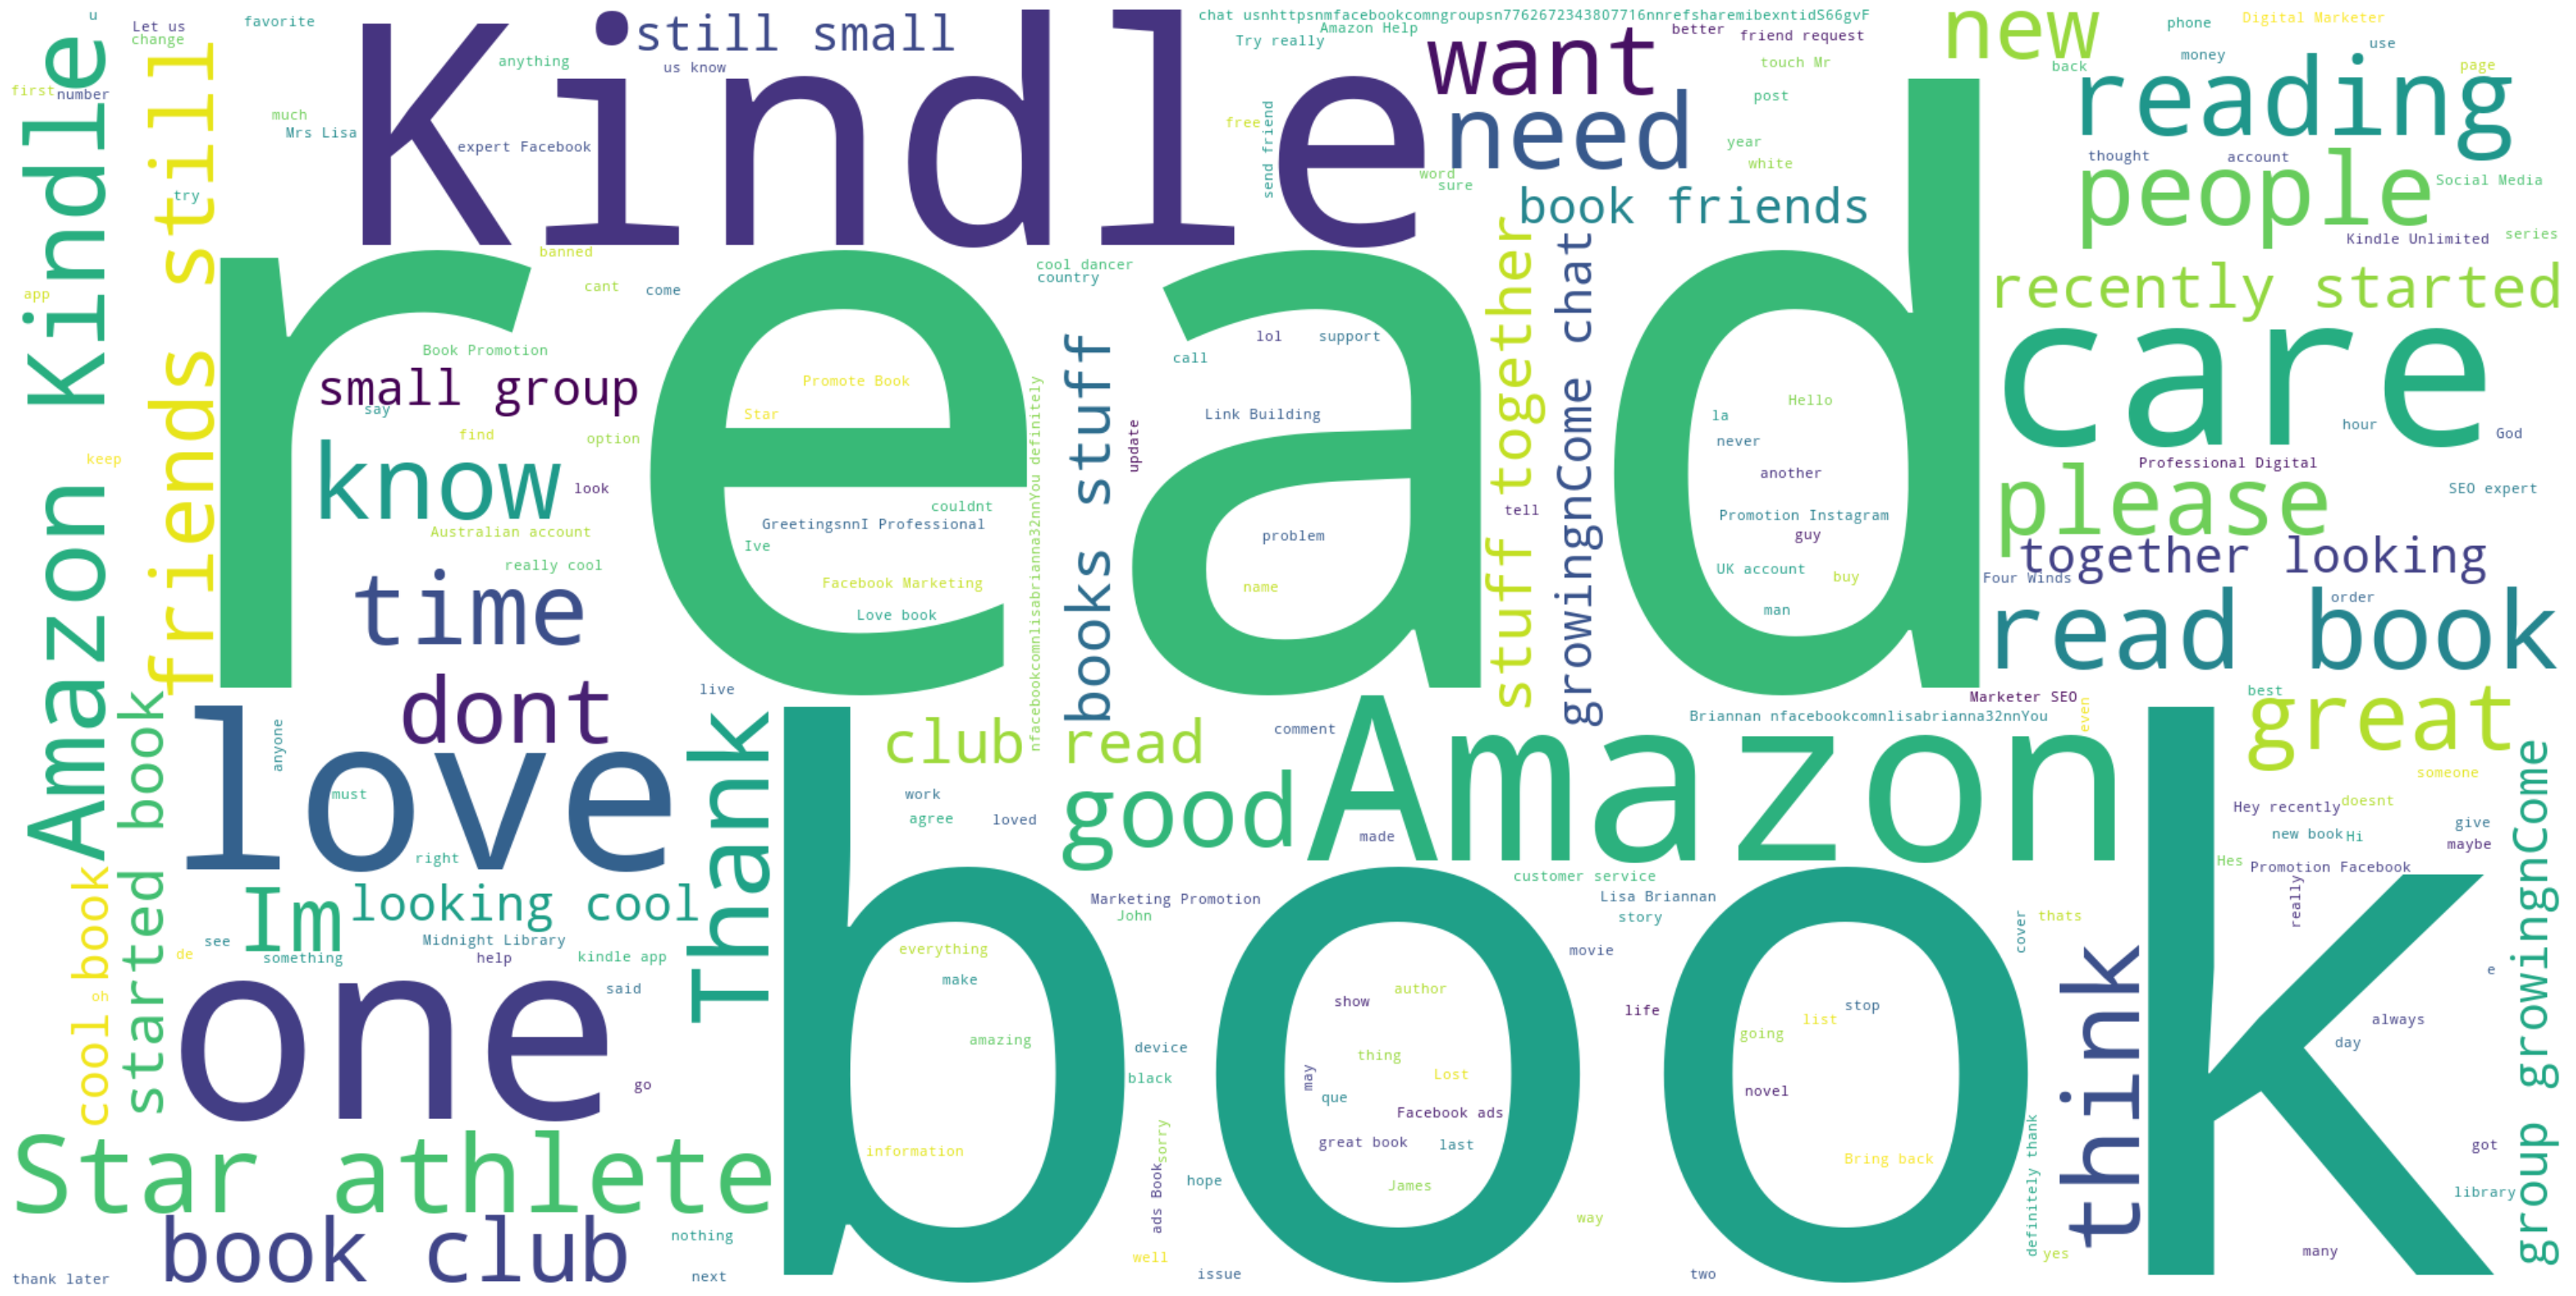

In [1529]:
generate_wordcloud_yourdata_commentfull_commenttext(data)

sử dụng hàm download() từ thư viện nltk để tải xuống gói dữ liệu 'vader_lexicon'. 

Gói dữ liệu này chứa từ điển VADER (Valence Aware Dictionary and sEntiment Reasoner), một công cụ phân tích cảm xúc tiếng Anh phổ biến trong lĩnh vực xử lý ngôn ngữ tự nhiên (NLP). VADER được sử dụng để phân tích cảm xúc và đánh giá tích cực, tiêu cực hoặc trung lập của các đoạn văn bản. Sau khi chạy đoạn mã trên, gói dữ liệu 'vader_lexicon' sẽ được tải xuống và sẵn sàng sử dụng trong các tác vụ phân tích cảm xúc bằng nltk.

In [455]:
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer


# Khởi tạo SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Tải dữ liệu comments từ tệp CSV
comment_text_data = data['comments_full'].apply(lambda x: re.findall(r"'comment_text': '(.*?)'", x))


# Kết hợp tất cả dữ liệu comment_text thành một chuỗi
text = ' '.join([item for sublist in comment_text_data.tolist() for item in sublist])

# Token hóa văn bản thành các câu riêng biệt
sentences = sent_tokenize(text)

# Thực hiện phân tích cảm xúc trên mỗi câu
sentiments = []
for sentence in sentences:
    sentiment_score = sia.polarity_scores(sentence)
    sentiment = 'Positive' if sentiment_score['compound'] >= 0 else 'Negative'
    sentiments.append(sentiment)

# Tạo một DataFrame mới với kết quả phân tích câu và cảm xúc
data_with_sentiment = pd.DataFrame({'sentence': sentences, 'sentiment': sentiments})

# In DataFrame với kết quả phân tích câu và cảm xúc
print(data_with_sentiment)

                                               sentence sentiment
0           I’ve had three kindles just keep upgrading.  Positive
1     I have the kindle app on my phone, so I gave m...  Positive
2     I just kept it in my account and if there’s a ...  Positive
3                                     Very cool, Laura!  Positive
4                                     😎 A NOVEL family!  Positive
...                                                 ...       ...
3839                        I generally love her books!  Positive
3840  Try out really cool dancer on Amazon kindle Ma...  Positive
3841  Kerrie Awaywiththefaer\nies Kindle Unlimited M...  Positive
3842                                 Excellent actress.  Positive
3843  Loved Cagney and Lacey x x Jan Farmer Saw her ...  Positive

[3844 rows x 2 columns]


In [456]:
#in ra 5 bình luận tích cực đầu tiên
data_with_sentiment.head(5)

sentence sentiment
0        I’ve had three kindles just keep upgrading.  Positive
1  I have the kindle app on my phone, so I gave m...  Positive
2  I just kept it in my account and if there’s a ...  Positive
3                                  Very cool, Laura!  Positive
4                                  😎 A NOVEL family!  Positive

In [457]:
# Lọc khung dữ liệu để chỉ chọn những bình luận tiêu cực
negative_comments = data_with_sentiment[data_with_sentiment['sentiment'] == 'Negative']

# In 10 bình luận tiêu cực đầu tiên
print(negative_comments.head(10))

                                             sentence sentiment
6   No discount came up when signing up so I did n...  Negative
11  You can try sending me one I went to D.W. Dani...  Negative
19  i am so mad y’all released this color right af...  Negative
22  When we filed a complaint you deleted the acco...  Negative
24  I’ve exhausted ever Amazon resource I could fi...  Negative
34  It said the account was terminated with no exp...  Negative
36                                   Is this a scam??  Negative
38           The war has displaced us from our homes.  Negative
44                              This is so offensive.  Negative
48                        That ad is just irritating!  Negative


In [1195]:
# Đếm số lượng bình luận tích cực và tiêu cực
positive_count = (data_with_sentiment['sentiment'] == 'Positive').sum()
negative_count = (data_with_sentiment['sentiment'] == 'Negative').sum()

# Tạo biểu đồ hình tròn
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['green', 'red']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Ratio of Positive and Negative Comments')

# Hiển thị biểu đồ hình tròn
plt.show()

# user id


In [ ]:
import datetime

In [469]:
# tạo danh sách list_userID và lưu lại thông tin commenter_id từ tất cả các bình luận trong cột 'comments_full' 
list_userID = []
for post in data['comments_full']:
    for comment in eval(post):
        if comment['commenter_id'] not in list_userID:
            list_userID.append(comment['commenter_id'])

In [470]:
# làm sạch dữ liệu list_userID, chỉ giữ lại phần sau ký tự '/' 
list_userID = [id[id.rfind('/') + 1:] for id in list_userID]

In [471]:
# #lấy thông tin hồ sơ của các người dùng từ danh sách list_userID.

# from facebook_scraper import get_posts, get_profile
# commenter = []
# for id in list_userID:
#     try:
#         user = get_profile(id)
#         commenter.append(user)
#         print(f"Added profile no.{len(commenter)}")
#     except:
#         continue

c:\Users\VuHieu\miniconda3\Lib\site-packages\facebook_scraper\facebook_scraper.py:855: UserWarning: Facebook language detected as vi_VN - for best results, set to en_US
  warnings.warn(


Added profile no.1
Added profile no.2
Added profile no.3
Added profile no.4
Added profile no.5
Added profile no.6
Added profile no.7
Added profile no.8
Added profile no.9
Added profile no.10
Added profile no.11
Added profile no.12
Added profile no.13
Added profile no.14
Added profile no.15
Added profile no.16
Added profile no.17
Added profile no.18
Added profile no.19
Added profile no.20
Added profile no.21
Added profile no.22
Added profile no.23
Added profile no.24
Added profile no.25
Added profile no.26
Added profile no.27
Added profile no.28
Added profile no.29
Added profile no.30
Added profile no.31
Added profile no.32
Added profile no.33
Added profile no.34
Added profile no.35
Added profile no.36
Added profile no.37
Added profile no.38
Added profile no.39
Added profile no.40
Added profile no.41
Added profile no.42
Added profile no.43
Added profile no.44
Added profile no.45
Added profile no.46
Added profile no.47
Added profile no.48
Added profile no.49
Added profile no.50
Added pro

In [476]:
# # Khởi tạo khung dữ liệu để cào thông tin trên Facebook
# userID_full = pd.DataFrame(columns=commenter[0].keys(), index=range(len(commenter)), data=commenter)

# # lưu lại dưới dạng csv
# path = 'Data/userID.csv'
# userID_full.to_csv(path, index=False)

In [486]:
userID_df = pd.read_csv('Data/userID_Cleaned.csv')

cài đặt thư viện geopy

In [479]:
%pip install geopy

     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.3 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.3 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 40.3/40.3 kB 485.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------------- -------------------------- 41.0/125.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import hai gói Nominatim từ geopy.geocoders và Translator từ googletrans.
from geopy.geocoders import Nominatim
from googletrans import Translator

In [1432]:
# khởi tạo geolocator
geolocator = Nominatim(user_agent="crawl_page")

def country(place):
    '''
    Lấy thông tin quốc gia dựa trên vị trí

    '''
    
    # Xử lý một số trường hợp đặc biệt
    if "Huyện" in place:
        # Nếu chỗ chứa "Huyện", tách chuỗi và gọi đệ quy hàm
        return country(place.split('Huyện')[1])
    if ',' in place:
        # Nếu địa điểm chứa dấu phẩy, hãy tách chuỗi và gọi đệ quy hàm với phần cuối cùng
        return country(place.split(', ')[-1])
    
    try:
        # lấy thông tin địa điểm bằng cách sử dụng công cụ geolocator
        location = geolocator.geocode(place, language='en')
        return location.address.split(',')[-1]
    except:
        try:
            # Nếu lấy thông tin không thành công, hãy thử dịch địa điểm sang tiếng Anh và thử lại
            translator = Translator()
            location = geolocator.geocode(translator.translate(place, dest='en').text, language='en')
            return country(place)
        except:
            print("Error at", place)
        return 1

 Nepal


In [1532]:
#kiểm tra
print(country("Nam Dinh"))

 Vietnam


In [1533]:
def extract_location(place):
    if not place:
        return None, None
    
    location = place.split('\n')
    city = location[0] if len(location) >= 1 else None
    country = location[2] if len(location) >= 3 else None
    
    return city, country

In [1435]:
#rích xuất thông tin về địa điểm và quê hương từ cột 'Nơi từng sống' và lưu trữ vào hai cột 'location' và 'hometown'
userID_df['location'] = userID_df['Nơi từng sống'].apply(lambda x: extract_location(x)[0] if isinstance(x, str) else None)
userID_df['hometown'] = userID_df['Nơi từng sống'].apply(lambda x: extract_location(x)[1] if isinstance(x, str) else None)

In [1436]:
# # Lấy thông tin quốc gia của từng người trong userID
# userID_df['country'] = userID_df['location'].apply(lambda x: country(x) if x else None)

In [ ]:

# load thông tin userID đã được xử lý sạch sẽ
userID_df = pd.read_csv('Data/userID_final.csv')

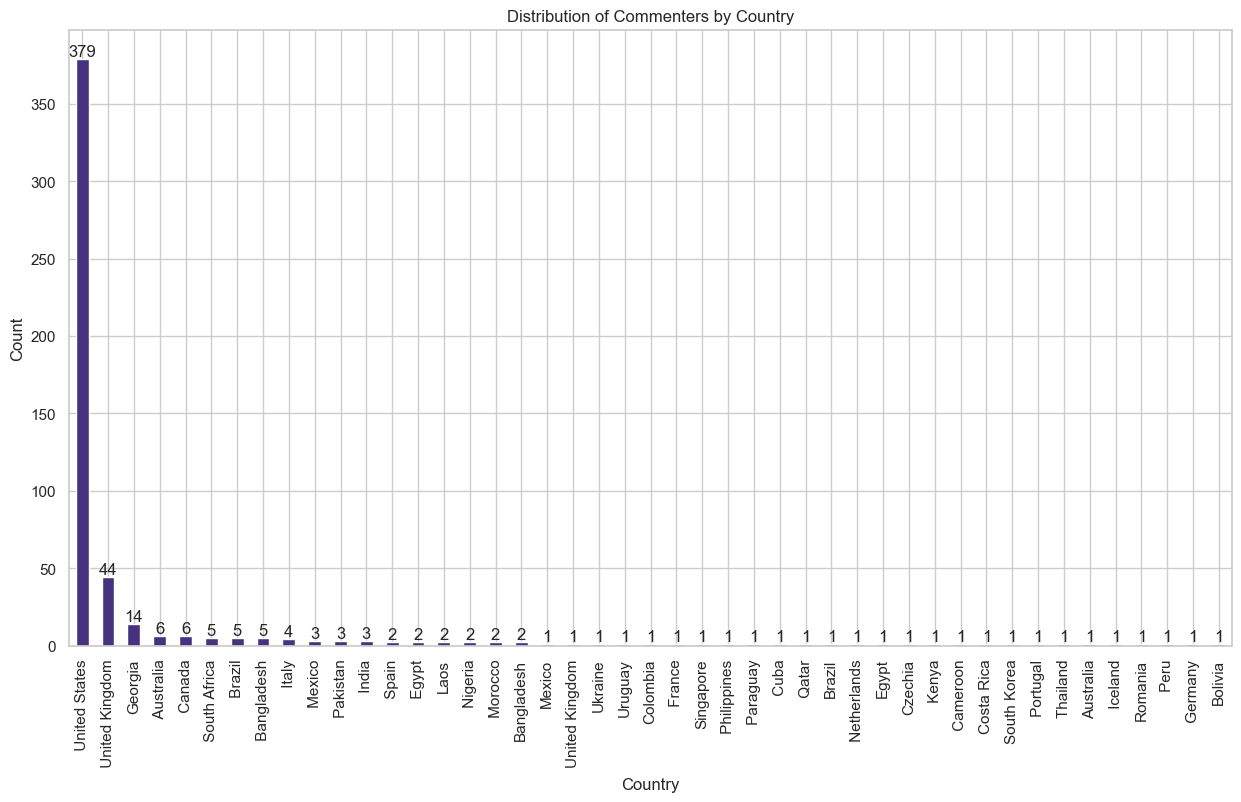

In [1438]:


# Đếm số lượng người bình luận theo quốc gia
country_counts = userID_df['country'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 8))
country_counts.plot(kind='bar')
plt.title('Distribution of Commenters by Country')
plt.xlabel('Country')
plt.ylabel('Count')

# thêm nhãn
for i, count in enumerate(country_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# vẽ
plt.show()

In [499]:
#cài đặt thư viện pycountry-convert
%pip install pycountry-convert

     ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
     --------------------------------------- 0.0/10.1 MB 640.0 kB/s eta 0:00:16
     --------------------------------------- 0.0/10.1 MB 326.8 kB/s eta 0:00:31
     --------------------------------------- 0.0/10.1 MB 326.8 kB/s eta 0:00:31
     --------------------------------------- 0.0/10.1 MB 326.8 kB/s eta 0:00:31
     --------------------------------------- 0.1/10.1 MB 479.3 kB/s eta 0:00:21
      -------------------------------------- 0.1/10.1 MB 500.5 kB/s eta 0:00:20
      -------------------------------------- 0.2/10.1 MB 476.3 kB/s eta 0:00:21
      -------------------------------------- 0.2/10.1 MB 491.5 kB/s eta 0:00:21
      -------------------------------------- 0.2/10.1 MB 461.0 kB/s eta 0:00:22
      -------------------------------------- 0.2/10.1 MB 464.5 kB/s eta 0:00:22
      -------------------------------------- 0.3/10.1 MB

In [ ]:
import pycountry_convert as pc

In [1486]:

def get_continent(country_name):
    # Kiểm tra xem country_name có phải là một chuỗi không
    if isinstance(country_name, str):
        # Xóa khoảng trắng đầu và cuối
        country_name = country_name.strip()
        
        # Chuyển đổi tên quốc gia thành mã quốc gia
        country_code = pc.country_name_to_country_alpha2(country_name)
        
        # Chuyển đổi mã quốc gia sang mã lục địa
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        
        # Chuyển đổi mã lục địa thành tên lục địa
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        # trả về tên lục địa
        return continent_name
    else:
        # Nếu country_name không phải là một chuỗi, trả về none
        return None


In [ ]:
# Áp dụng hàm get_continent cho cột “country” của userID_df
# và gán tên lục địa cho một cột mới gọi là 'region'
userID_df['region'] = userID_df['country'].apply(get_continent)

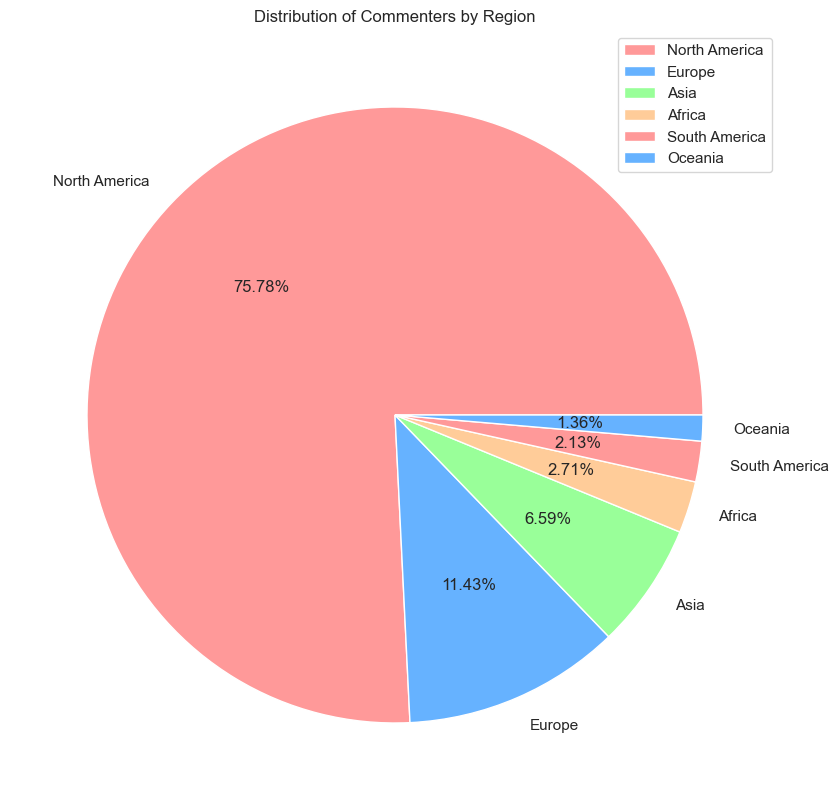

In [1465]:


# Data
regions = userID_df['region'].value_counts().index
counts = userID_df['region'].value_counts()

# Define colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Create pie chart
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=regions, autopct='%1.2f%%', colors=colors)

# Customize the chart
plt.title('Distribution of Commenters by Region')
plt.legend(regions, loc='upper right')
plt.show()

In [1443]:
# # lưu lại file userID đã xử lý sạch sẽ
# path = 'Data/userID_final.csv'
# userID_df.to_csv(path, index=False)